 #  Supervised and Unsupervised Learning ML Projects:

## 1.Supervised learning

### (a) Regression bilan classificationning farqi nima? Shu haqida o’ylab ko’rib, kichikina report yozing;

> **Regression** predicts **values**           
> **Classification** predicts **classes**

`Regression and classification --> (self, semi) supervised learning only `

#### Regression:
***Regression*** continoius valuelarni ya'ni columnlari raqamlardan yoki object data type bo'lgan qiymatlarni bashorat qilishda ishlatilinadi.
 * Decision boundary is too simple.
 * Time and accuracy tradeoff




**Applications**:
* Car sales prediction
* Stock Price prediction
* Forecasting your company's revenue based on many performace metrics   
* Hourse price prediction -> How much will this house sell for?





In [416]:
#                     🛏️ x4                    [0, 0, 0, 1]             
#   🏠 --> Features:  🛀 x2   --> Encoding:    [0, 1, 0, 0]  --> Inputs -->  💻 ML model -> Output= $98,750
#                     🚗 x2                    [0, 1, 0, 0]                            
#                     ...                       ...   

#### Classification:
***Classification*** supervised learning algorithimi bo'lib, input data qaysi class yoki labelga tegishli ekanligini bashorat qilishda ishlatilinadi. 

 MLda classification lar asosiy 3 ta guruhga bo'linadi:
* Binary classification -> one thing or another (Yes/No, True/False, 1/0)
    * Applications:
        * Is this email smap or not spam?
        * Disease diagnosis (Posotive or Negative)


* Multiclass classification -> 2 dan ortiq class lar; more than one thing or another
    * Applications:
        * Food image classification -> Bu rasmdagi ovqat oshmi, mastavami yoki pizzami?
        * Email categorizer -> Work, Social, Promotions
        * Object recognition -> Dog, cat, horse, car
* Multi label classification -> bir sample data ko'plab casslarga tegishli bo'lishi; multi label options per sample
    * Applications:
        *  Artice lar -> Deep learning haqidagi artikl -> Machine Learning, Representation learning, Artificial Intelegence classlariga tegishli bo'lishligi.
        * News: La liga started sponsorship with Microsoft's Beyond stats and PowerBi -> Sports news, Football news, Technology news

 ## b)
 ### Imtixon natijalari va universitetga qabul qilish datasetlaridan foydalanib ML projectlarni bajaring:   
#### i. data yuklab olish funktsiyasidan foydalanib exams.csv va college.csv yuklab olinadi;   
#### ii. data to’liq tahlil qilinadi;   
#### iii. data visualization amalga oshiriladi;   
#### iv. exams.csv da X va y belgilab olinadi. Bu holatda data featurelariga qarab math score prediction   qilinishi kerak, ya’ni, X (features) -¿ reading score, writing score, gender, race, parental level of   education, lunch, test preparation course. y -¿ math score.   
#### v. college.csvda X va y belgilab olinadi. Bu holatda o’zingizga qiziqarli bo’lgan featureni javob   sifatida belgilab, o’zingiz muhim deb hisoblangan qolgan featurelarni (hammasidan foydalanmasa  ham bo’ladi) X sifatida belgilanadi;   
#### vi. data preprocessing amalga oshiriladi (StandardScaler OneHotEncoder va hokazo);   
#### vii. exams.csv uchun train jarayoni amalga oshiriladi (bu data regression task bo’lgani sababli sklearndagi   LinearRegression, DecisionTreeRegressor, hamda RandomForestRegressor kabi modellardan foydalanib qaysi birida eng    yuqori aniqlilik chiqishini taqqoslab ko’ring;   
#### viii. college.csv uchun train jarayoni amalga oshiriladi (javob sifatid a qaysi featureni tanlaganingizga   qarab regression yoki classification task bo’lishi mumkin mabodo classification bo’lsa sklearndagi   LinearRegression, DecisionTreeClassifier, hamda RandomForestClassifier kabi modellardan foydalanib qaysi birida eng    yuqori aniqlilik chiqishini taqqoslab ko’ring;

#### i. Downloading exams.csv va college.csv datasets;   


In [417]:
import os, glob, shutil
import urllib.request as r

def data_yuklab_olish(saqlash_uchun_papka, data_nomi = "salaries"):

    data_nomlari = ["salaries", "exams", "college", "cars", "mall"]
    assert data_nomi in data_nomlari, f"Mavjud bo'lgan dataset {data_nomlari} dan birini kiriting!"

    if data_nomi == "college": url = "https://drive.google.com/file/d/1vwfMpQ4ikAI91zn1bWxP_Iqz7DTFUA9F/view?usp=sharing"
    elif data_nomi == "salaries": url = "https://drive.google.com/file/d/1p-XtX29fgXT9CzBfpHm3t8r028gQPRhe/view?usp=sharing"
    elif data_nomi == "exams": url = "https://drive.google.com/file/d/1TYN_sRmauaDgNYgQ-0VSHVAJvLoxKx2R/view?usp=sharing"
    elif data_nomi == "cars": url = "https://drive.google.com/file/d/1Fi5IPdfEktnKyf3dyHmnh84a2jiXl33A/view?usp=sharing"
    elif data_nomi == "mall": url = "https://drive.google.com/file/d/1eGWJVRNmGjfaH0o3dczBbNe_-RrW0_Jm/view?usp=sharing"

    full_path = f"{saqlash_uchun_papka}/{data_nomi}.zip"
    os.makedirs(saqlash_uchun_papka, exist_ok = True)

    # Download from the checkpoint path
    if os.path.isfile(f"{saqlash_uchun_papka}/{data_nomi}.csv"): print("Data yuklab olingan"); pass

    # If the checkpoint does not exist
    else:
        print("Datani yuklash boshlanmoqda...")

        # Get file id
        file_id = url.split("/")[-2]

        # Initialize prefix to download
        prefix = "https://drive.google.com/uc?/export=download&id="

        # Download the checkpoint
        r.urlretrieve(f"{prefix + file_id}", f"{full_path}")
        shutil.unpack_archive(f"{full_path}", f"{saqlash_uchun_papka}")
        os.remove(full_path)

        files = sorted(glob.glob(f"{saqlash_uchun_papka}/*"), key = os.path.getctime)
        fname = os.path.basename(files[-1])
        os.rename(f"{saqlash_uchun_papka}/{fname}", f"{saqlash_uchun_papka}/{data_nomi}.csv")
        print(f"Data {saqlash_uchun_papka} papkasiga {data_nomi} nomi bilan yuklab olindi.")

In [418]:
data_yuklab_olish(saqlash_uchun_papka="./datasets", data_nomi="exams")

Data yuklab olingan


#### ii. Data analysis process   


In [419]:
import pandas as pd
exam_data = pd.read_csv("./datasets/exams.csv")
exam_data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [420]:
exam_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [421]:
exam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [422]:
# Datasetni missing valuelar uchun tekshiramiz
exam_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [423]:
exam_data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [424]:
exam_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [425]:
exam_data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [426]:
# Average test scores
exam_data.mean(numeric_only=True)

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [427]:
exam_data.sum(numeric_only=True)

math score       66089
reading score    69169
writing score    68054
dtype: int64

In [428]:
len(exam_data)

1000

#### iii. data visualization process;   


In [429]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

def data_analysis(data, column_name, color, bar_width, text_width):

  counts = data[column_name].value_counts().values
  cls_names = data[column_name].value_counts().index

  max_count = counts.max()
  text_height = max_count * 0.02

  fig, ax = plt.subplots(figsize = (20, 10))
  indices = np.arange(len(counts))

  ax.bar(indices, counts, bar_width, color=color)
  ax.set_xlabel("Klass Nomlari", color = "red", fontsize = 14)
  ax.set_ylabel("Data Miqdorlari", color = "red", fontsize = 14)
  ax.set_title(f"{column_name} data tahlili")
  # Add set_xticks
  ax.set_xticks(indices)
  ax.set_xticklabels(cls_names, rotation = 90)

  for i, v in enumerate(counts):
    ax.text(i - text_width, v + text_width, str(v), color = "blue", fontsize = 10)

  plt.tight_layout()
  plt.show()




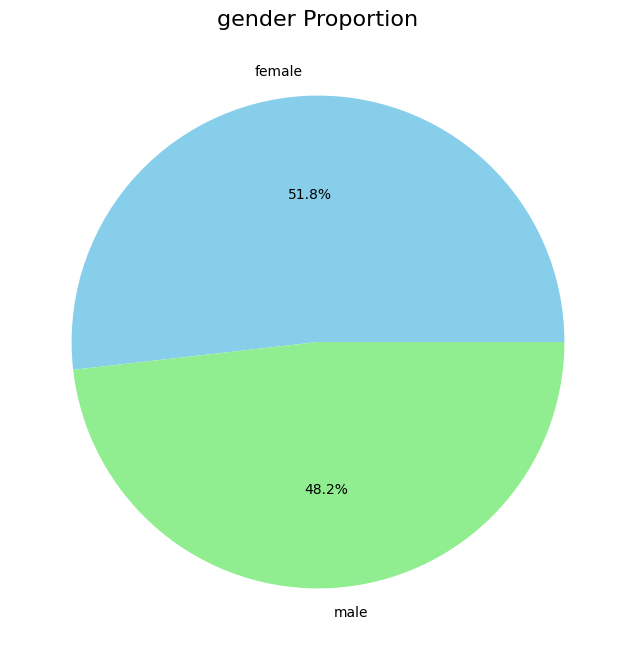

In [430]:
def pie_chart(data_nomi, column_name):
    data_nomi[column_name].value_counts().plot.pie(autopct="%1.1f%%", figsize=(8, 8), colors=["skyblue", "lightgreen"])
    plt.title(f"{column_name} Proportion", fontsize=16)
    plt.ylabel("")
    plt.show()


pie_chart(data_nomi=exam_data, column_name="gender")

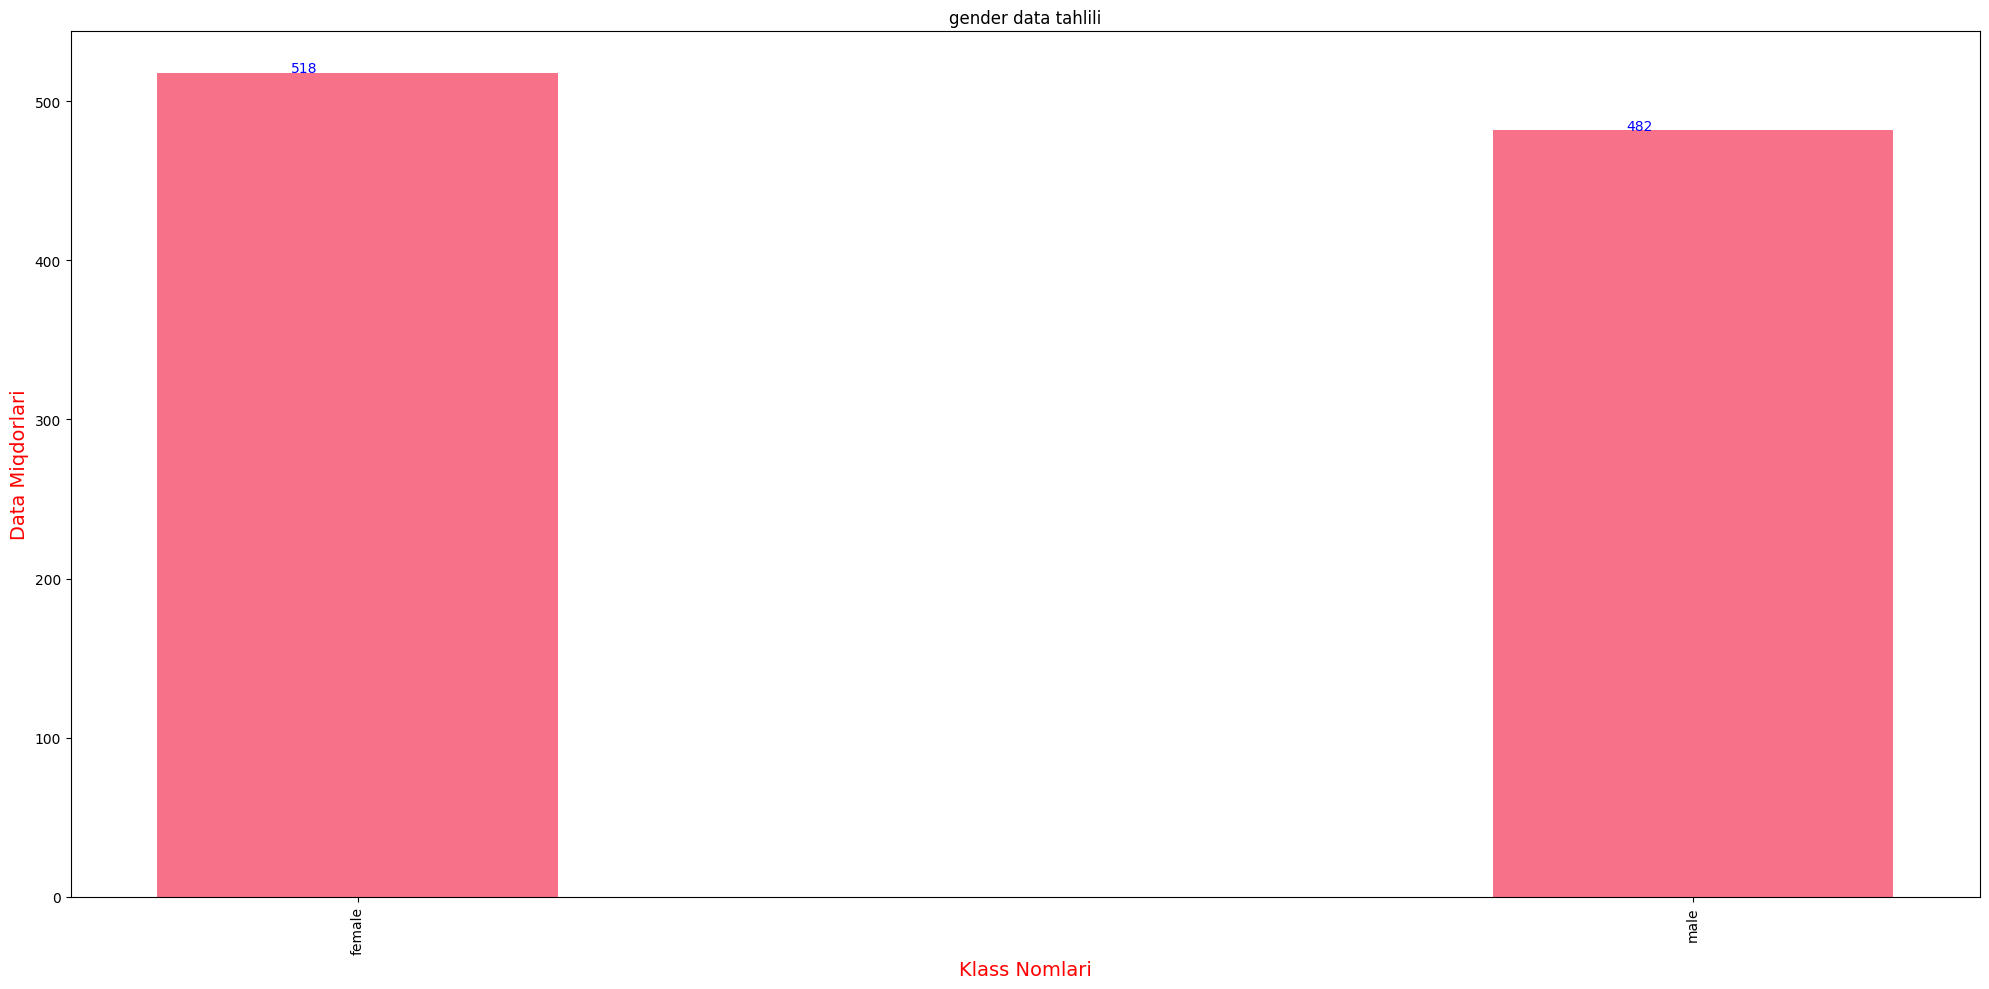

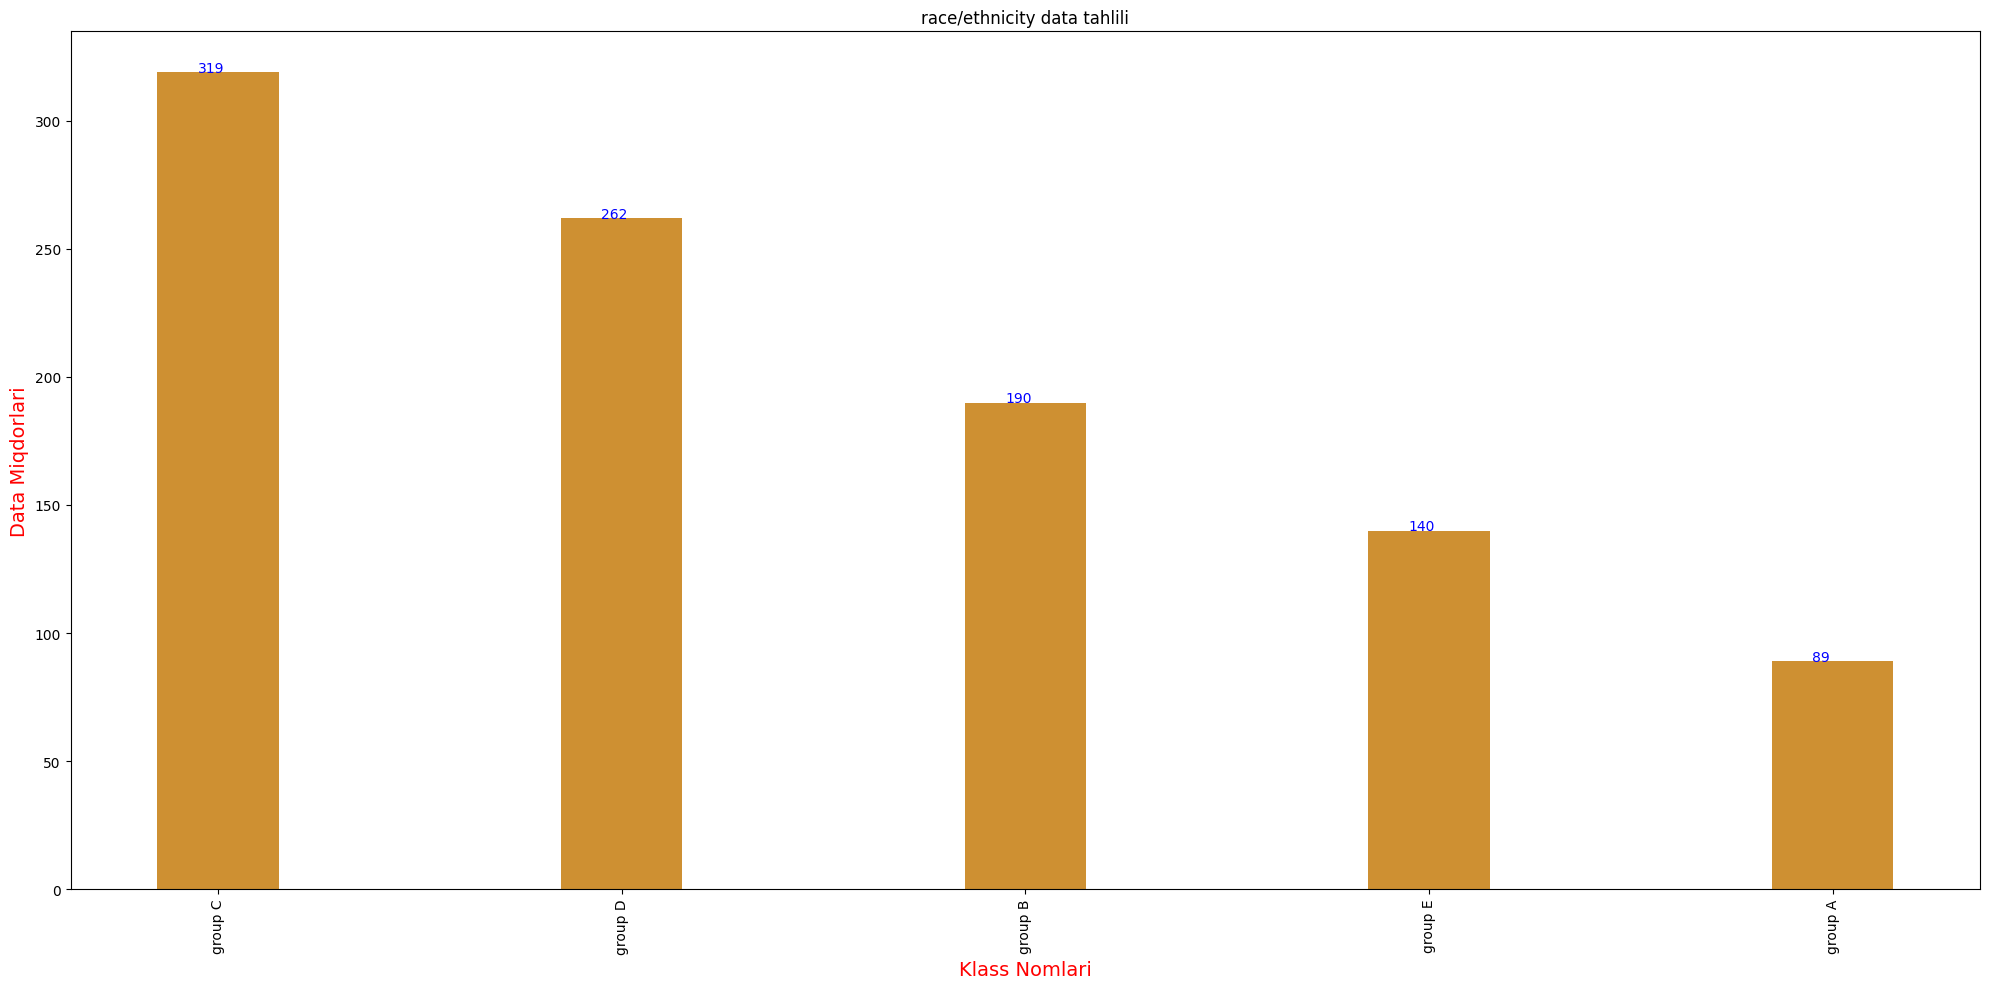

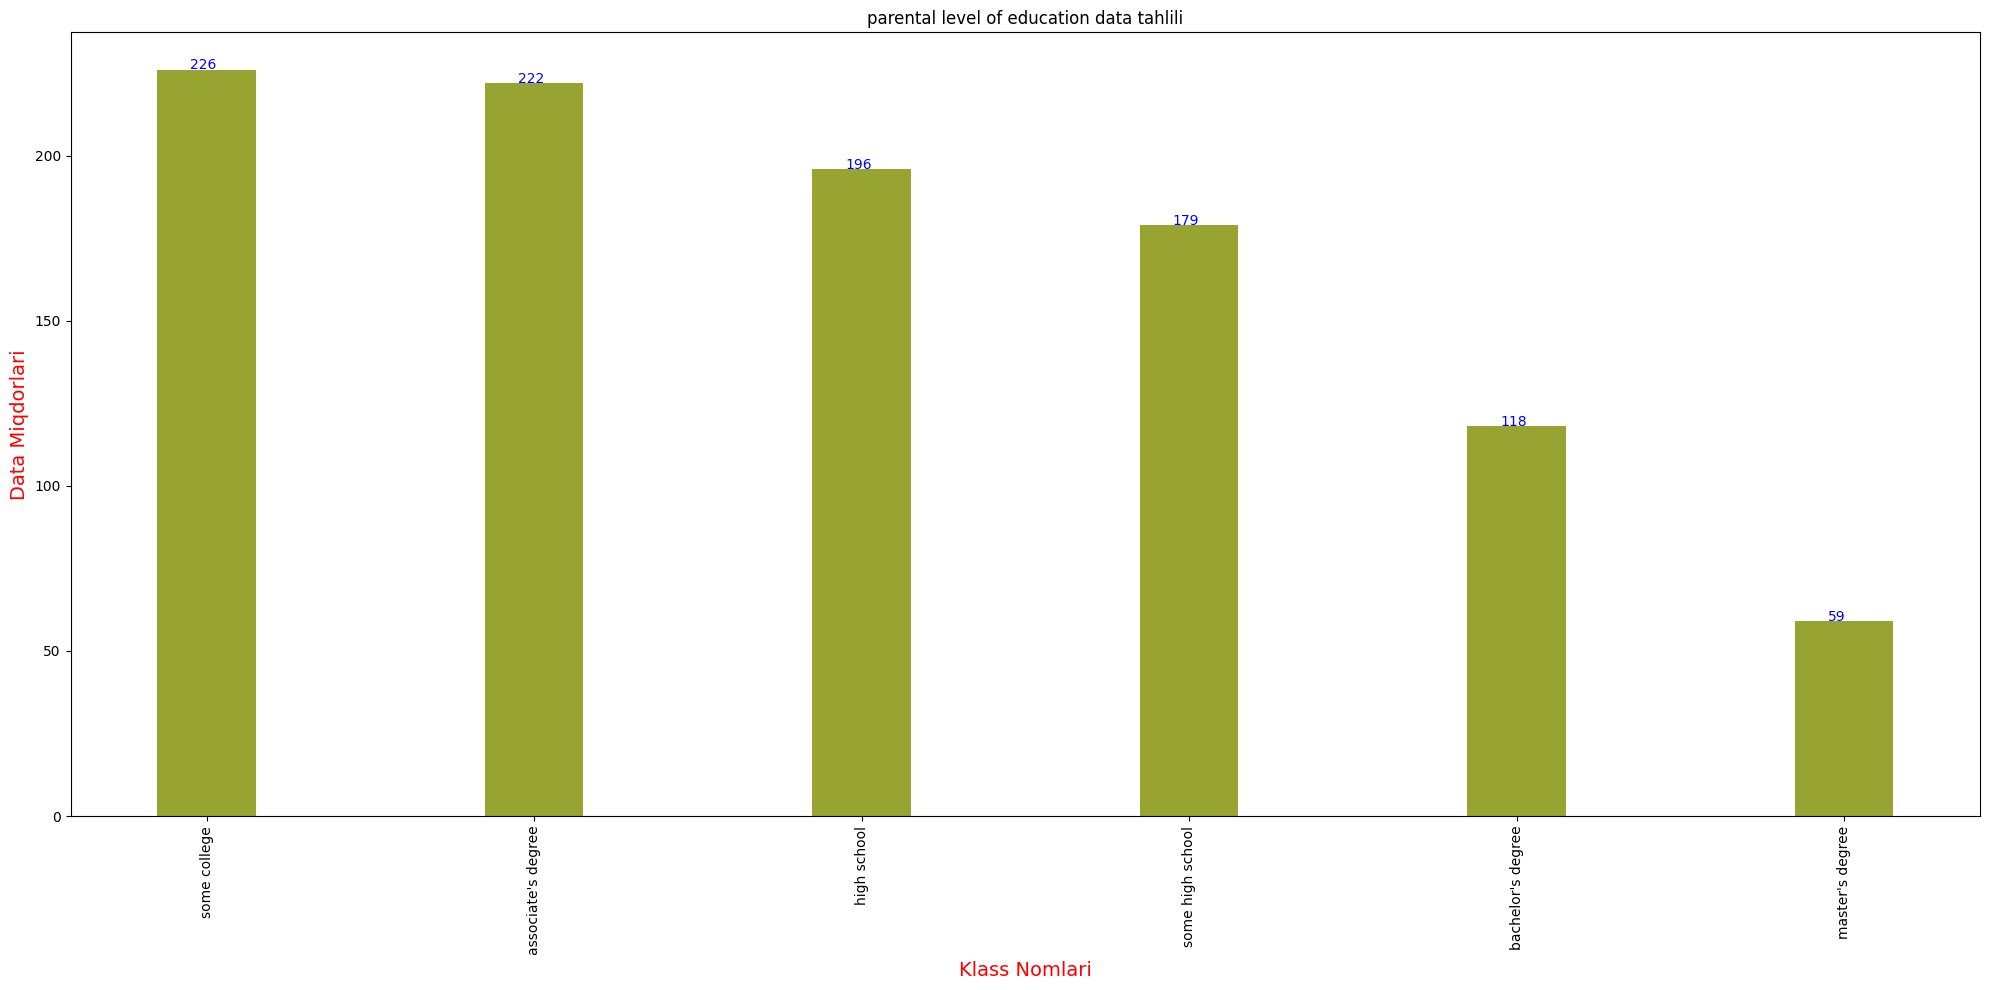

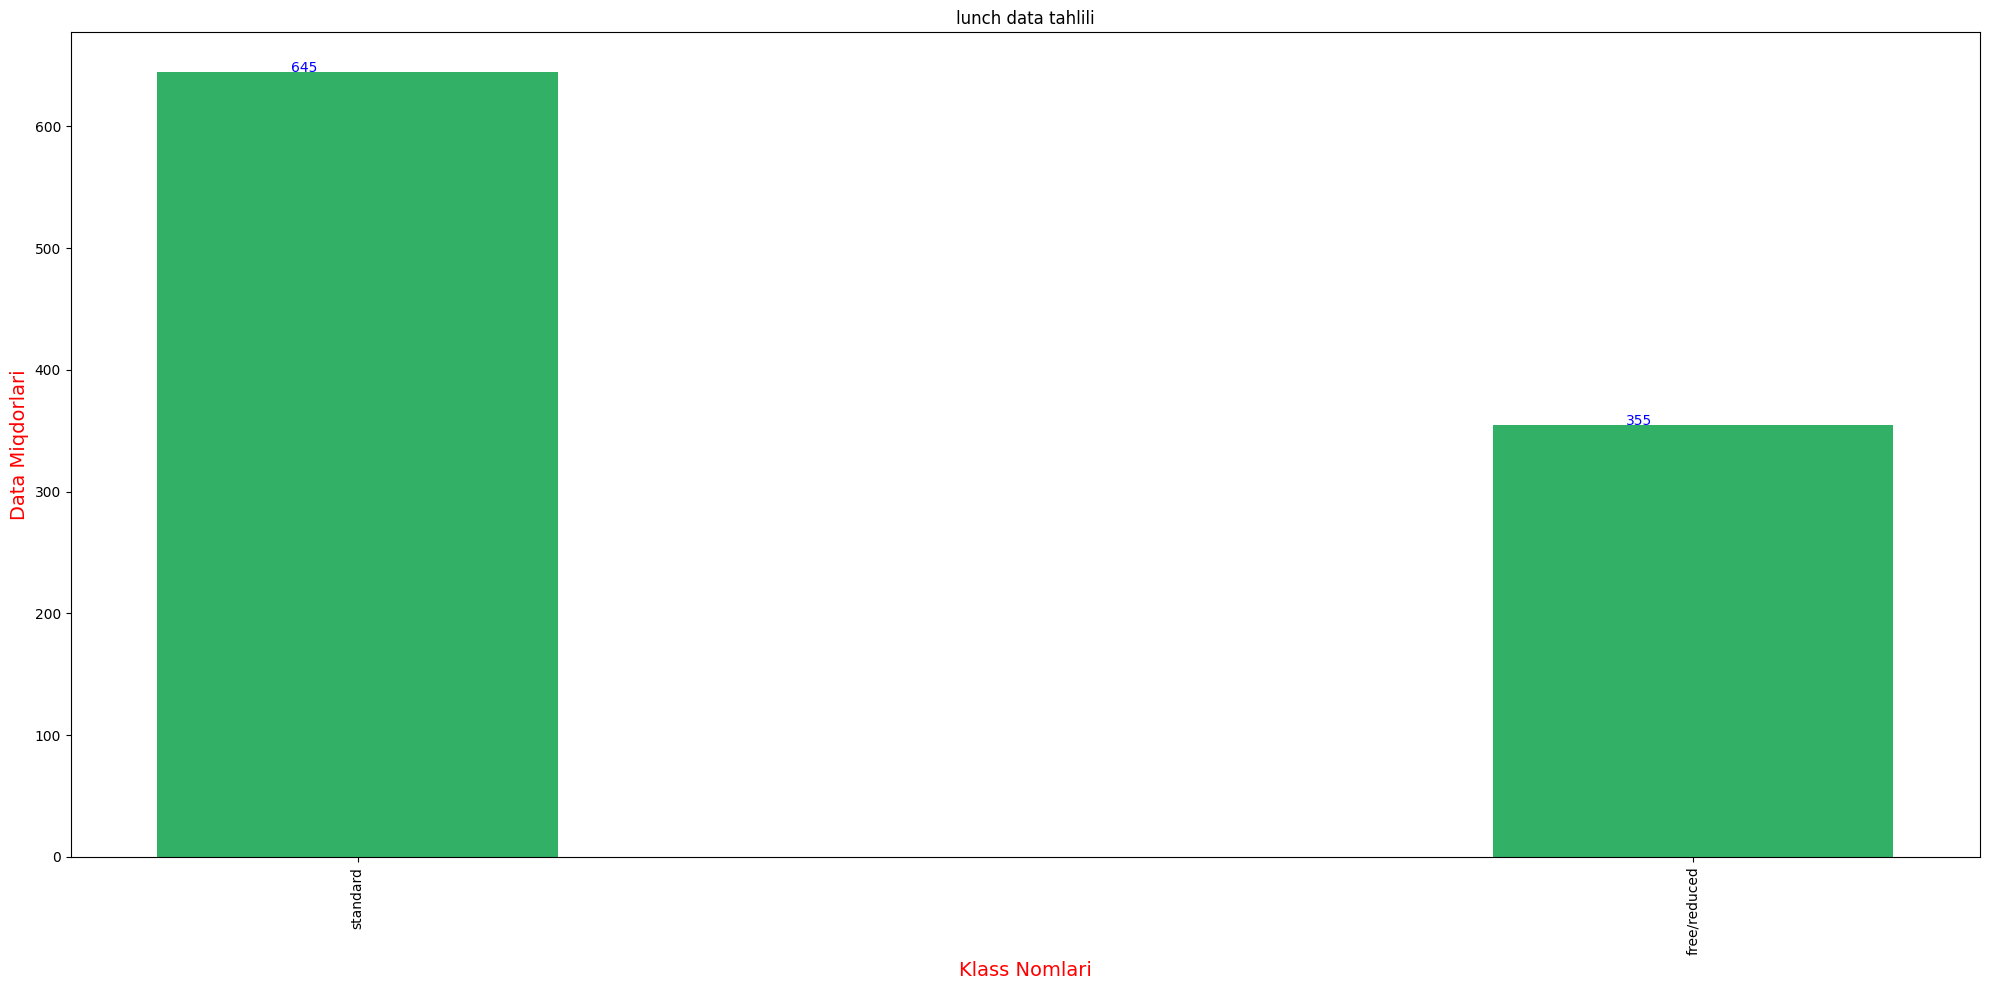

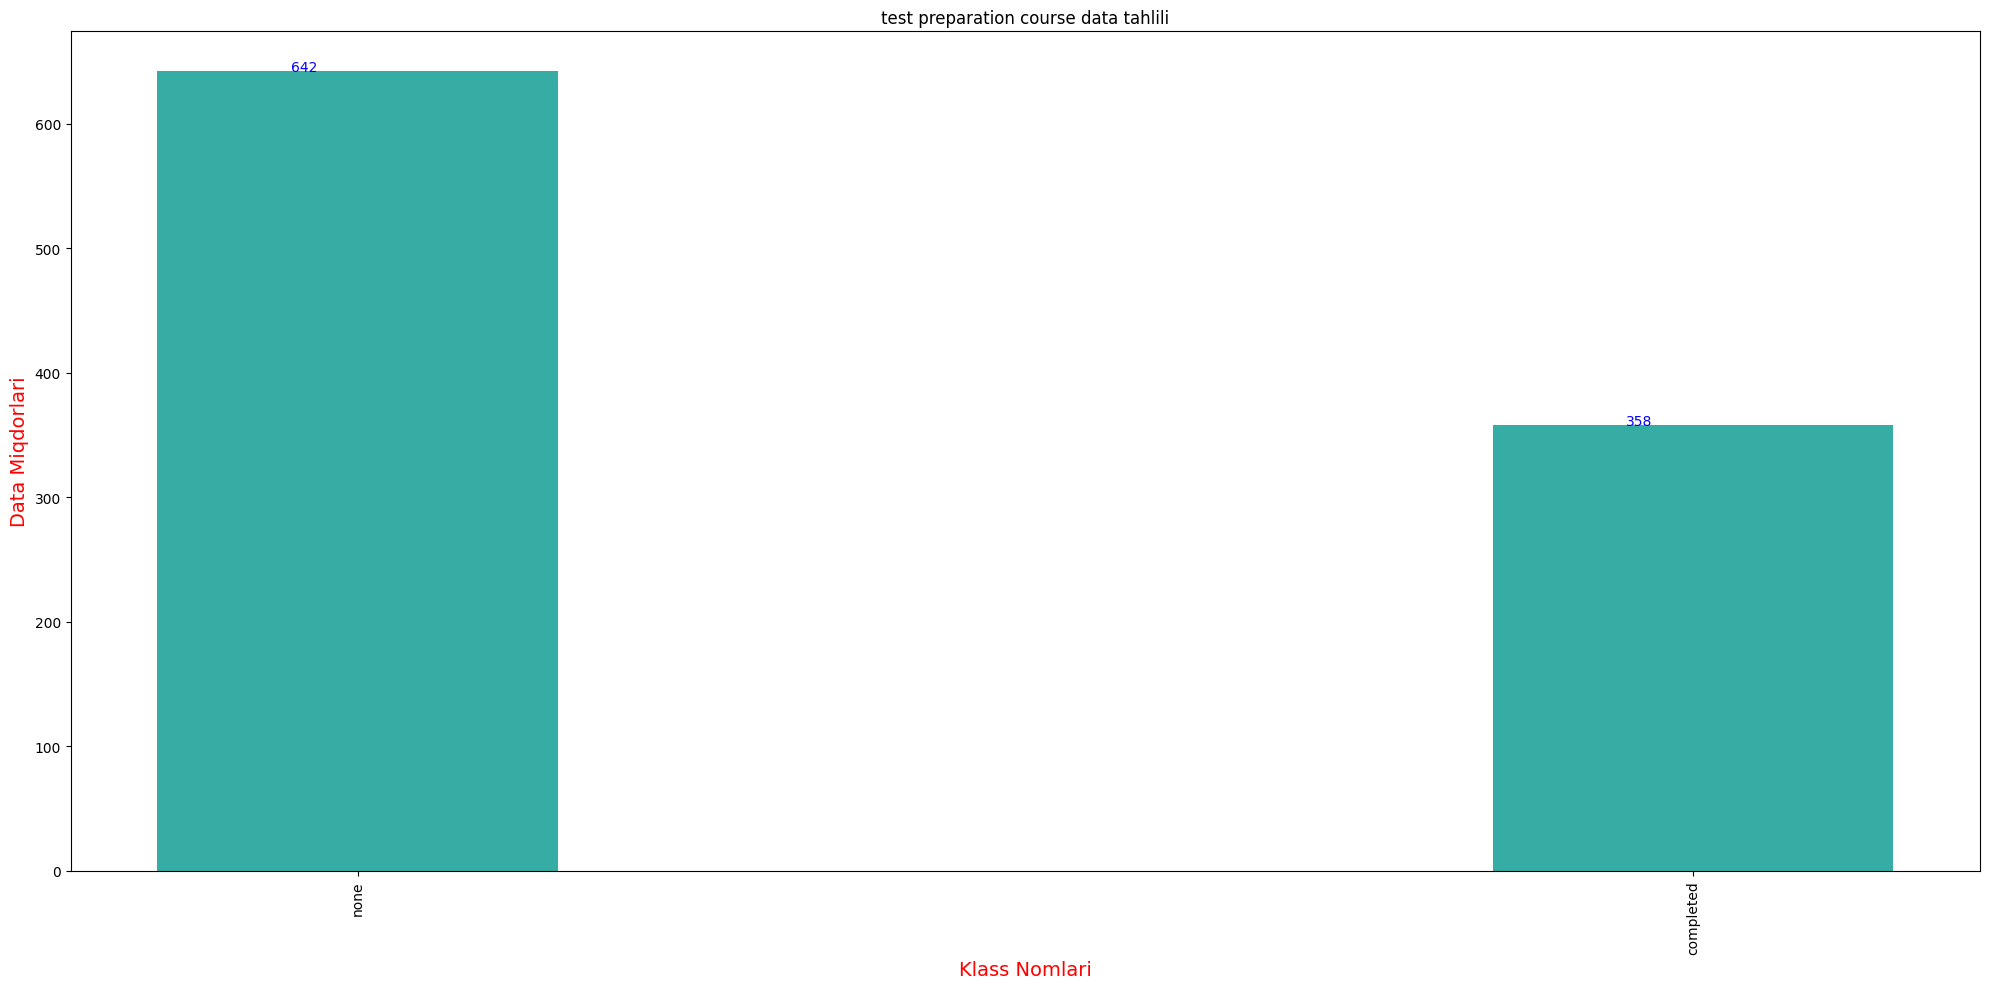

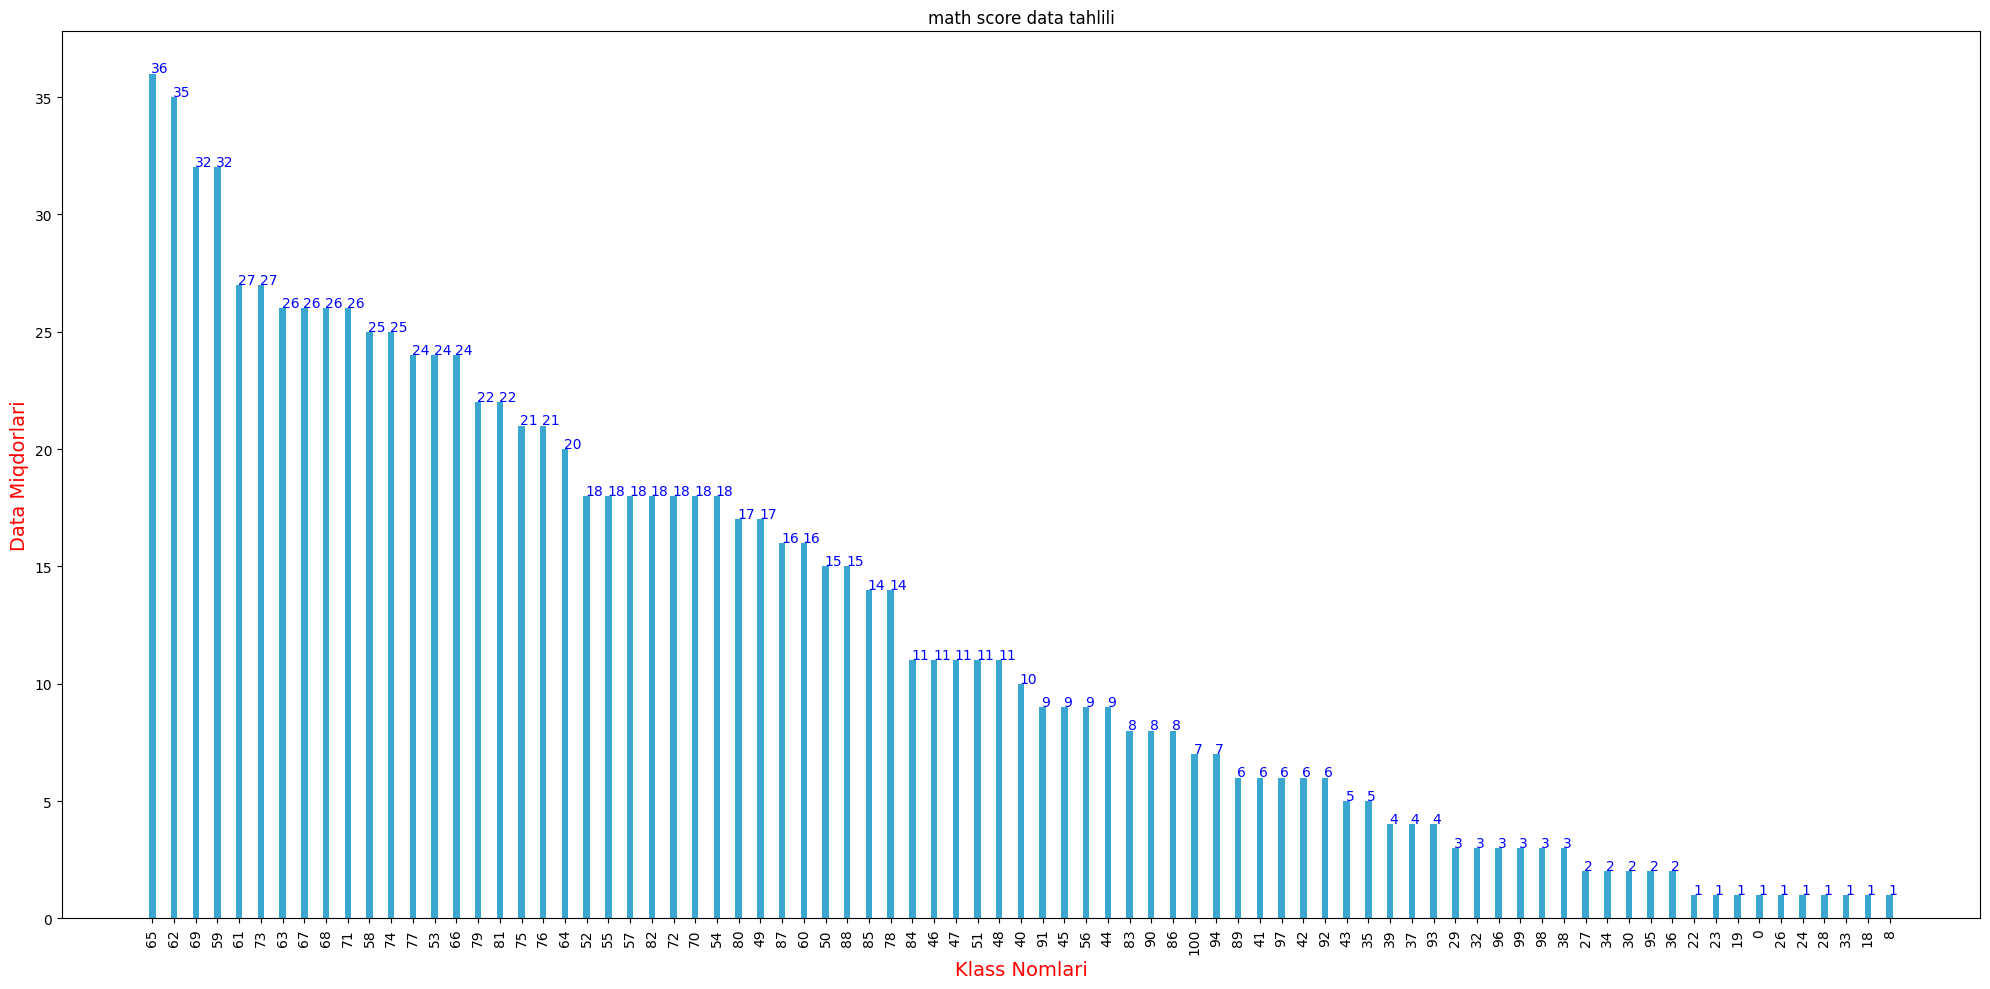

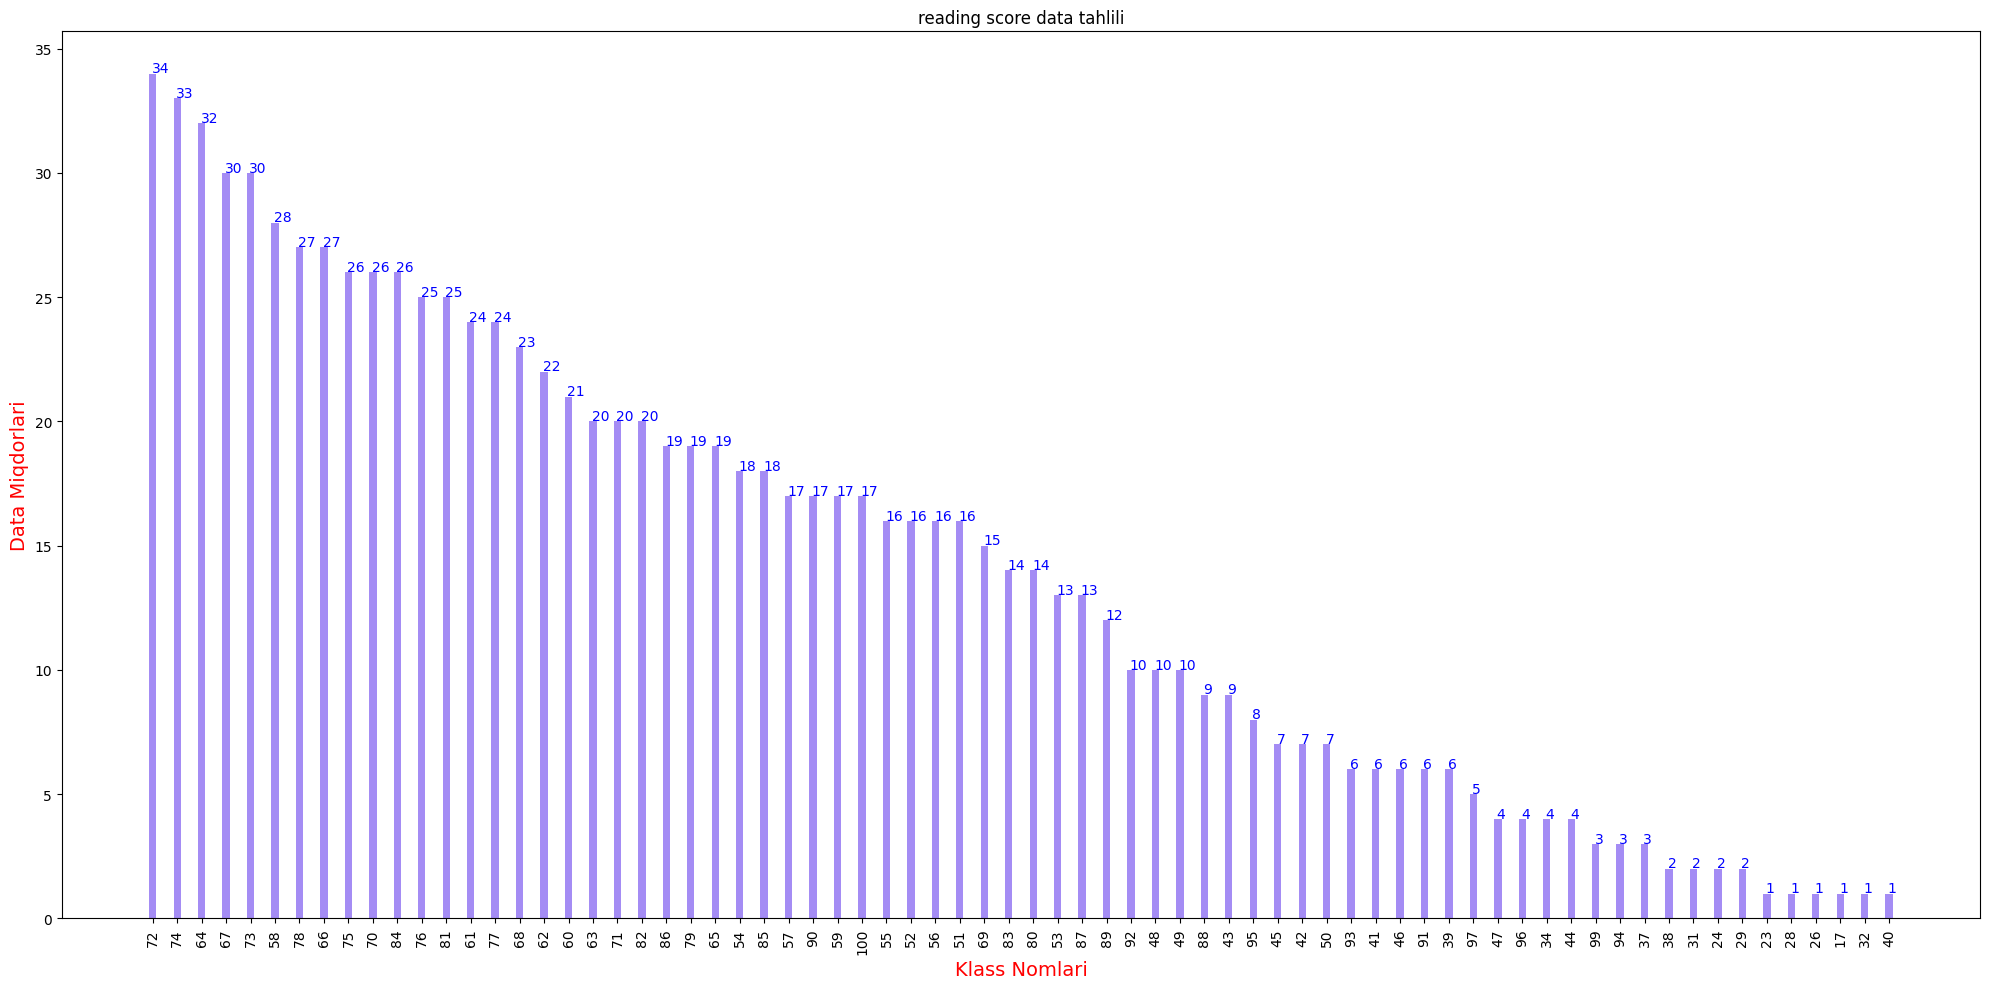

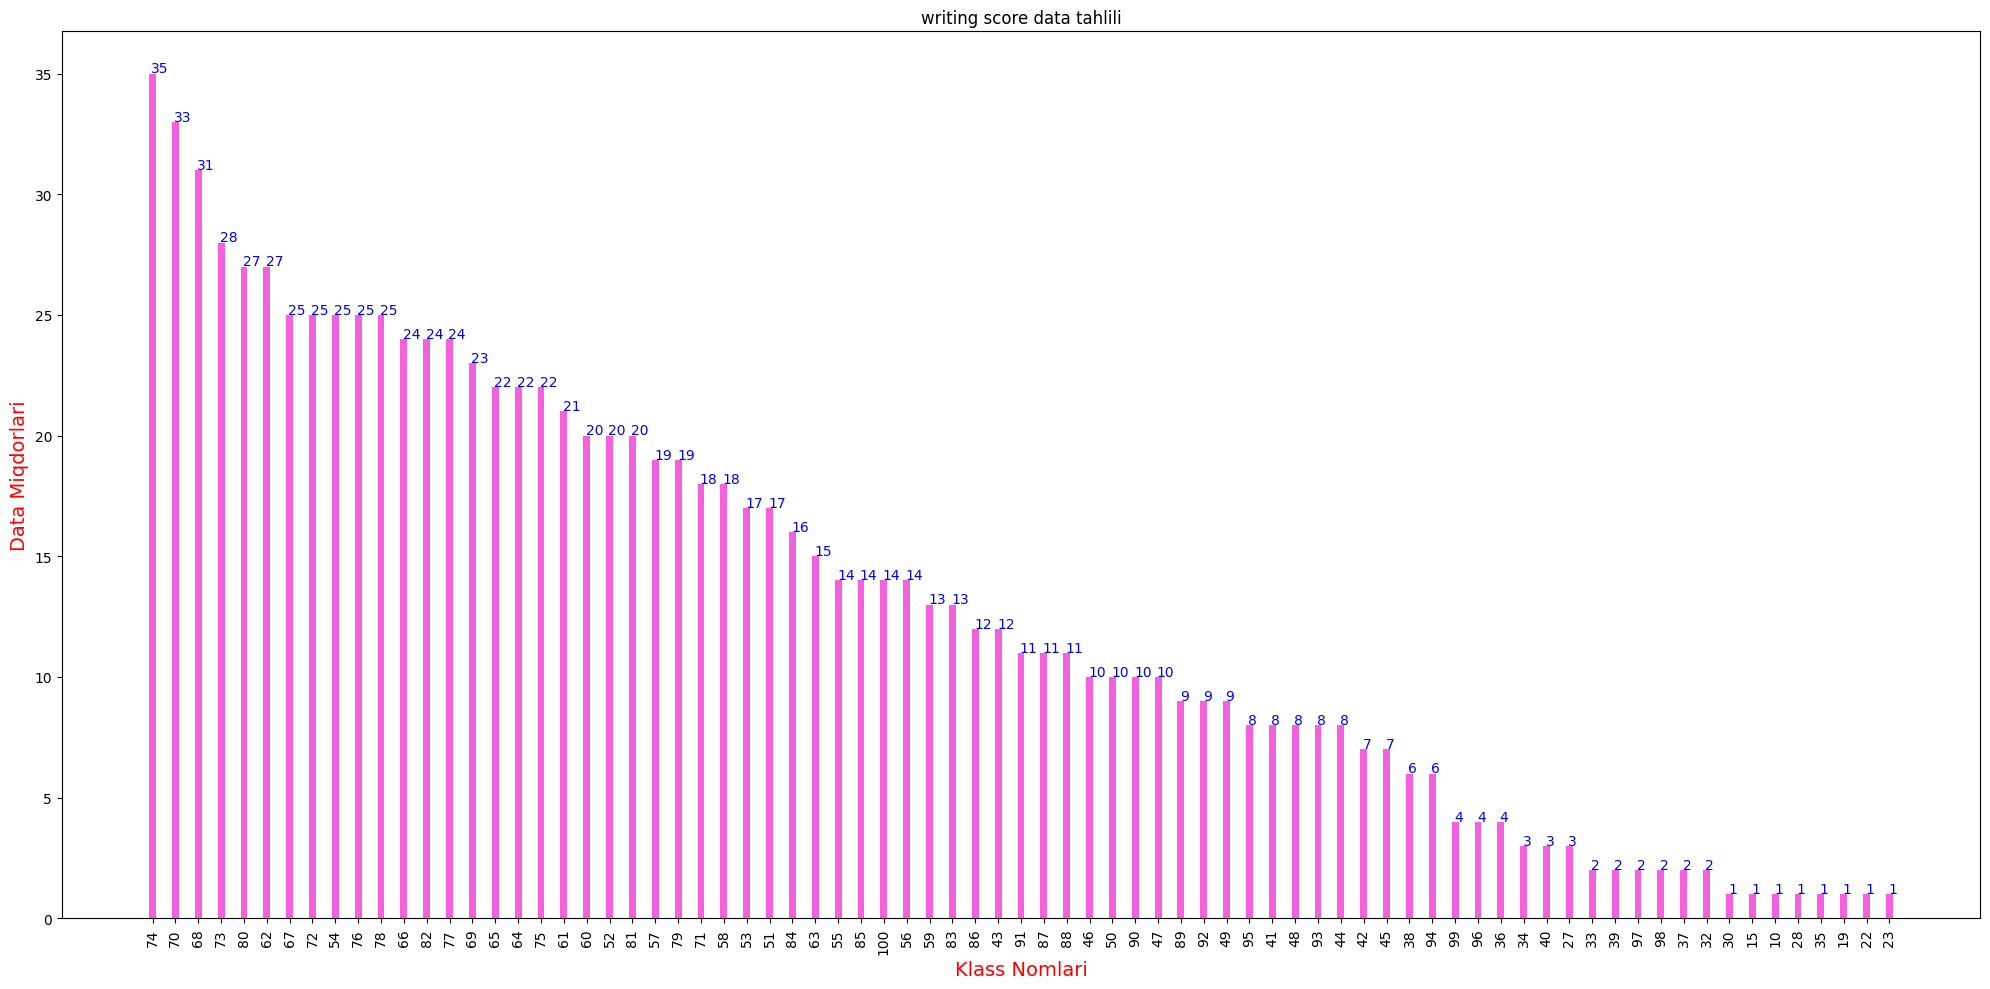

In [431]:
palette = sns.color_palette("husl", len(exam_data.columns)) 
for idx, coln in enumerate(exam_data.columns):
    data_analysis(data=exam_data, column_name=coln, color=palette[idx], bar_width=0.3, text_width=0.05)

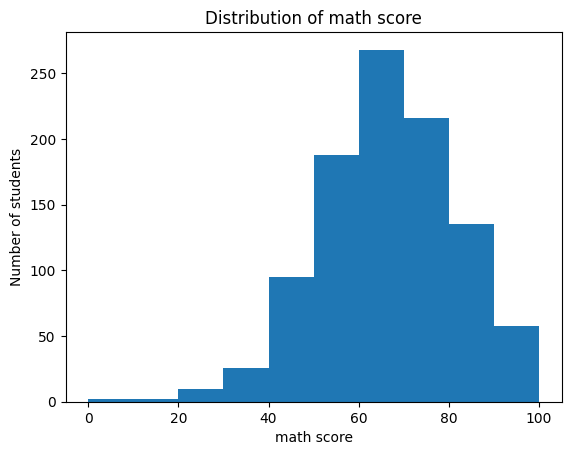

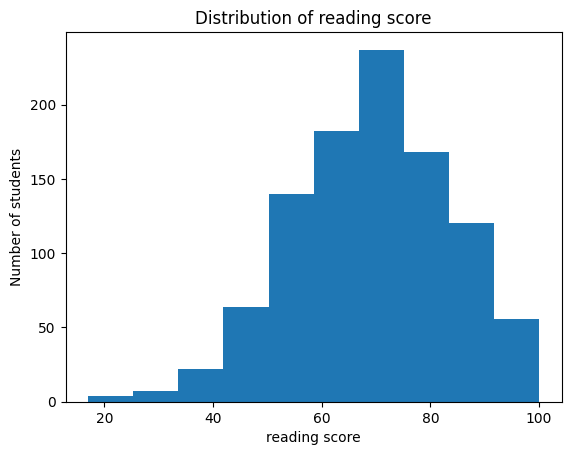

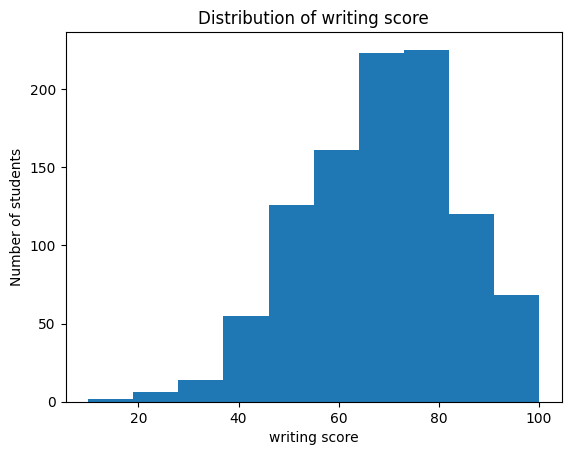

In [432]:
# Math, reading writnh score lar yaxshi visualize bo'lmagani uchun histogram plot qilamiz

for i in exam_data.columns[-3:]:
    plt.hist(exam_data[i])
    plt.title(f"Distribution of {i}")
    plt.xlabel(i)
    plt.ylabel("Number of students")
    plt.show()
 

#### iv. Choosing X and Y ```exams.csv```. Based on remaining features, the model predicts math score.
*  X (features) -> reading score, writing score, gender, race, parental level of   education, lunch, test preparation course. 
* y -> math score --> GT   


In [433]:
# 'math score' -> gt, y, class, prediction 
X = exam_data.drop(columns=["math score"], axis=1)
y = exam_data["math score"]

In [434]:
X.iloc[:3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93


In [435]:
y.head(2)

0    72
1    69
Name: math score, dtype: int64

In [436]:
data_yuklab_olish(saqlash_uchun_papka="./datasets", data_nomi="college")

Data yuklab olingan


In [437]:
college_data = pd.read_csv("./datasets/college.csv")
college_data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [438]:
# Predicting 'Expend'
X2 = college_data.drop(columns=["Grad.Rate"])
y2 = college_data["Grad.Rate"]

In [439]:
X2.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922


In [440]:
y2.head(3)

0    60
1    56
2    54
Name: Grad.Rate, dtype: int64

In [441]:
len(college_data)

777

#### vi. data preprocessing (StandardScaler OneHotEncoder and etc);   


In [442]:
from sklearn.model_selection import train_test_split
X_train2, X_validation2, y_train2, y_validation2 = train_test_split(X2, y2, test_size=0.2) # train_size -> 0.8
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_validation2, y_validation2, train_size=0.5) 


len(X_train2), len(X_valid2), len(X_test2)

(621, 78, 78)

In [443]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline

str_converter = Pipeline(steps= [ ("onehot", OneHotEncoder()) ])
num_converter = Pipeline(steps= [ ("scaler", StandardScaler()) ] )
str_converter

Pipeline(steps=[('onehot', OneHotEncoder())])

In [444]:
num_converter

Pipeline(steps=[('scaler', StandardScaler())])

In [445]:
college_data.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [446]:
number_columns = X_train2[X_train2.columns[2:]]
number_columns.iloc[:3] # Before

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend
685,14752,9572,5329,48,85,30017,5189,5130,3309,650,3140,91,99,19.7,11,7837
340,3073,2672,1547,9,29,9649,1792,4300,2643,450,1660,57,68,19.0,11,5801
723,1231,1074,345,34,66,1295,105,11600,3610,400,850,66,91,12.4,37,7735


In [447]:
num_col_array  = np.array(number_columns)
num_col_array.shape

(621, 16)

In [448]:
num_converter.fit_transform(num_col_array) # After

array([[ 3.06491078,  3.12539163,  4.96918147, ...,  1.40232195,
        -0.93264604, -0.34338838],
       [ 0.04389489,  0.29489568,  0.86416254, ...,  1.22514664,
        -0.93264604, -0.77772728],
       [-0.43257666, -0.36063078, -0.44049975, ..., -0.44536336,
         1.16990953, -0.36514799],
       ...,
       [ 0.34214228,  0.70265118,  1.36345093, ...,  0.61768846,
        -1.01351357, -0.69196881],
       [ 1.44925317,  0.90858002,  0.52660017, ..., -2.31835943,
         0.44210183,  4.05546625],
       [-0.57976033, -0.5907624 , -0.53601579, ..., -0.34412033,
         0.6847044 , -0.34360171]])

In [449]:
X_train2.columns[0]

'Unnamed: 0'

In [450]:
# Before
X_train2["Unnamed: 0"]

685    University of Texas at Austin
340         Mankato State University
723                 Wartburg College
147          Concordia University CA
436        Oklahoma State University
                   ...              
765                  Wingate College
380                 Monmouth College
345              Marshall University
191                 Emory University
28                  Augsburg College
Name: Unnamed: 0, Length: 621, dtype: object

In [451]:
# After One hot encoding
str_converter.fit_transform(np.array(X_train2["Unnamed: 0"]).reshape(-1, 1)).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [452]:
# Ordinal encoder

encoder = OrdinalEncoder()
a = encoder.fit_transform(np.array(X_train2["Unnamed: 0"]).reshape(-1, 1))
a

array([[549.],
       [273.],
       [577.],
       [122.],
       [350.],
       [582.],
       [307.],
       [468.],
       [ 79.],
       [220.],
       [592.],
       [326.],
       [601.],
       [409.],
       [527.],
       [488.],
       [496.],
       [385.],
       [325.],
       [408.],
       [336.],
       [434.],
       [521.],
       [588.],
       [161.],
       [296.],
       [599.],
       [ 31.],
       [564.],
       [238.],
       [343.],
       [ 91.],
       [ 60.],
       [517.],
       [412.],
       [230.],
       [505.],
       [365.],
       [612.],
       [461.],
       [420.],
       [587.],
       [164.],
       [514.],
       [179.],
       [ 67.],
       [335.],
       [424.],
       [ 30.],
       [ 53.],
       [357.],
       [274.],
       [540.],
       [356.],
       [214.],
       [437.],
       [ 86.],
       [427.],
       [254.],
       [143.],
       [185.],
       [212.],
       [391.],
       [324.],
       [415.],
       [268.],
       [ 6

#### vii. Model Training on `exams.csv`

Perform regression using `LinearRegression`, `DecisionTreeRegressor`, and `RandomForestRegressor` from scikit-learn. Evaluate model performance and compare results to identify the best-performing estimator.

In [453]:
# 'math score' -> prediction, y, label
X3 = exam_data.drop(columns=["math score"])
y3 = exam_data["math score"]

In [454]:
X_train3, X_validation3, y_train3, y_validation3 = train_test_split(X3, y3, test_size=0.3)  # 70% Train
X_valid3, X_test3, y_valid3, y_test3 = train_test_split(X_validation3, y_validation3, test_size=0.5, random_state=42)  # 15% Val; 15% Test

In [455]:
exam_data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [456]:
exam_data[exam_data.columns[:5]]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [457]:
str_columns = exam_data.columns[:5].tolist()
str_columns

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']


Model Performance on Validation Set:
                   Validation MSE  Validation R² Score
Linear Regression       31.463497             0.847852
Decision Tree           72.266667             0.650541
Random Forest           42.041471             0.796700


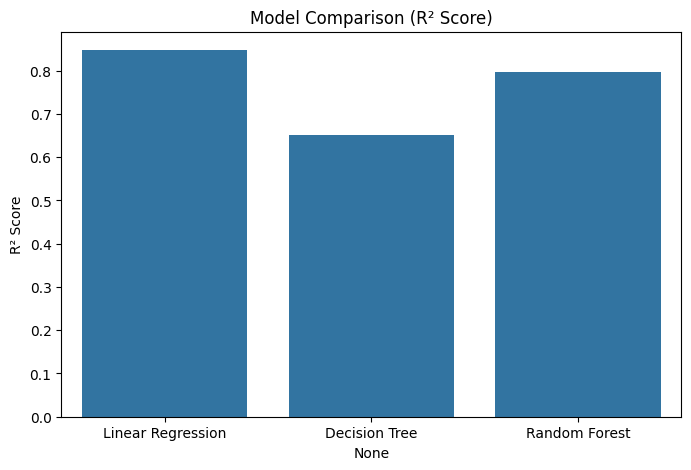

In [458]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer



# birinchi 5 str qiymatda(dtype: object) bolgan columnlar
categorical_columns = X3.select_dtypes(include=["object"]).columns.tolist()

# OneHotEncoder
one_hot_encoder = ColumnTransformer(
    [("one_hot", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_columns)],
    remainder="passthrough"
)

X3_encoded = one_hot_encoder.fit_transform(X3)

X_train3 = one_hot_encoder.fit_transform(X_train3)
X_valid3 = one_hot_encoder.transform(X_valid3)
X_test3 = one_hot_encoder.transform(X_test3)


# Standardize Data 
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_valid3 = scaler.transform(X_valid3)
X_test3 = scaler.transform(X_test3)

# Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train3, y_train3)
    y_pred_valid = model.predict(X_valid3)
    
    mse = mean_squared_error(y_valid3, y_pred_valid)
    r2 = r2_score(y_valid3, y_pred_valid)
    
    results[name] = {"Validation MSE": mse, "Validation R² Score": r2}

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance on Validation Set:")
print(results_df)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df["Validation R² Score"])
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()

  
#### viii. college.csv uchun train jarayoni amalga oshiriladi (javob sifatid a qaysi featureni tanlaganingizga   qarab regression yoki classification task bo’lishi mumkin mabodo classification bo’lsa sklearndagi   LinearRegression, DecisionTreeClassifier, hamda RandomForestClassifier kabi modellardan foydalanib qaysi birida eng    yuqori aniqlilik chiqishini taqqoslab ko’ring;

In [459]:
college_data.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


### Regression Task: Continoius Numerical Value

Agarda numerical qiymatlarga ega bo'lgan qiymatlarni predict qiladigan bo'lsak (Masalan: 'Grad.Rate'):
* Linear Regression,
* Decision Tree Regression,
* Random Forest Regression 
kabi modellardan foydalanib predict qilamiz
- **College name**, **Private** columnlarni uchun `OneHotEncoding`, qolgan columnlar uchun `Standar Scaling` yoki `Normalization` qiliamiz. 


### Classification Task: Object data type (non-numerical value)
Agar ***Private*** columni predict qilmoqchi bolsak:
* Decision Tree Classifier,
* Random Forest Classifier 
kabi modellardan foydalanib train jarayonini amalga  oshiramiz



In [460]:
for idx in college_data.columns:
    print(f"{idx} --> {college_data[idx].dtype}")

Unnamed: 0 --> object
Private --> object
Apps --> int64
Accept --> int64
Enroll --> int64
Top10perc --> int64
Top25perc --> int64
F.Undergrad --> int64
P.Undergrad --> int64
Outstate --> int64
Room.Board --> int64
Books --> int64
Personal --> int64
PhD --> int64
Terminal --> int64
S.F.Ratio --> float64
perc.alumni --> int64
Expend --> int64
Grad.Rate --> int64


# Regression ->
*  `Linear Regression`,
* ` Decision Tree`, 
* `Random Forest`


In [461]:
college_data.columns[1]

'Private'

In [462]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# College name ni regressionga gech qanaqa ta'siri bo'lmaganligi uchun drop qilamiz
X4 = college_data.drop(columns=["Grad.Rate", "Unnamed: 0"]) 
y4 = college_data["Grad.Rate"]

# Categorical column
categorical_col = ['Private']

# Preprocessor: OneHot encoding for categorical; StandardScaler for numerical columns
preprocessor = ColumnTransformer([
    ("one_hot", OneHotEncoder(drop="first"), categorical_col),
    ("scale", StandardScaler(), X4.select_dtypes(include=["int64", "float64"]).columns)
])

# Split data into train and test sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Define regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Trees": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
for name, model in regression_models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    # Train the model
    pipeline.fit(X_train4, y_train4)

    # Predict on the test set
    y_pred4 = pipeline.predict(X_test4)

    # Evaluate performance
    print(f"\n{name} performance:")
    print(f"MAE: {mean_absolute_error(y_test4, y_pred4):.2f}")
    print(f"MSE: {mean_squared_error(y_test4, y_pred4):.2f}")
    print(f"R2 score: {r2_score(y_test4, y_pred4):.2f}")


Linear Regression performance:
MAE: 8.18
MSE: 116.23
R2 score: 0.51

Decision Trees performance:
MAE: 14.99
MSE: 362.51
R2 score: -0.54

Random Forest performance:
MAE: 7.93
MSE: 107.64
R2 score: 0.54


In [463]:
college_data.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

# Classification ->
 * `Decision Tree classifer`
 * `Random Forest Classifier`

In [464]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_class = college_data.drop(columns=["Unnamed: 0", "Private"])
y_class = college_data["Private"] # gt

# Data splitting
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, train_size=0.8)


# Prepocessing
categorical_ftr = X_class.select_dtypes(include=["object"]).columns
numerical_ftr = X_class.select_dtypes(exclude=["object"]).columns

one_hot_encoder = OneHotEncoder(drop="first", handle_unknown="ignore")
scaler = StandardScaler()

X_train_encoded = one_hot_encoder.fit_transform(X_train_class[categorical_ftr])
X_test_encoded = one_hot_encoder.transform(X_test_class[categorical_ftr])

X_train_scaled = scaler.fit_transform(X_train_class[numerical_ftr])
X_test_scaled = scaler.transform(X_test_class[numerical_ftr])

# One hot-encodingda koplan nollar generate boladi, va memory effcieny uchun "scipy sparse"dan foydalanamiz
from scipy import sparse as sp
X_train_processed = sp.hstack([X_train_encoded, X_train_scaled])
X_test_processed = sp.hstack([X_test_encoded, X_test_scaled])

# Classification models
clasification_models = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42) 
}

#  Train and evaluate models
classification_results ={}

for name2, model2 in clasification_models.items():
    model2.fit(X_train_processed, y_train_class)
    y_pred2 = model2.predict(X_test_processed)
    accuracy = accuracy_score(y_test_class, y_pred2)
    classification_results[name2] = {"Accuracy" : f"{accuracy:.3}"}

classification_results_df = pd.DataFrame(classification_results).T
print("\nClassification Model Performance on Test Set:")
print(classification_results_df)




Classification Model Performance on Test Set:
                         Accuracy
Decision Tree Classifier    0.904
Random Forest Classifier    0.923


In [465]:
X_train_encoded # Before scipy.sparse

<621x0 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

## (c) 
#### Yuqorida tasvirlangan qadamlar asosida exams.csv uchun y (to’g’ri javob, class, label) ni o’zgartirib, 2 ta projectni bajaring. Ya’ni, 1) y – writing score; 2) y – reading score. Bu yerda yodda tutish kerak bo’lgan narsa, uangi y (class) tanlanganda ”eski y” featurelar (X)ga kirishi kerak bo’ladi hamda featurelar Xda hozirgi y (class) bo’lmasligi kerak.

In [466]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [467]:
exam_data.dtypes


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [468]:
X5 = exam_data.drop(columns=['writing score'])
y5 = exam_data['writing score']


X_train5, X_validation5, y_train5, y_validation5 = train_test_split(X5, y5, test_size=0.3)
X_valid5, X_test5, y_valid5, y_test5 = train_test_split(X_validation5, y_validation5, test_size=0.5)

len(X_train5), len(X_valid5), len(X_test5)

(700, 150, 150)

In [473]:

numerical_columns5 = exam_data.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_columns5.remove("writing score")
categorical_columns5 = exam_data.select_dtypes(exclude=["int64", "float64"]).columns.tolist()

# Preprocessing
preprocessor5 = ColumnTransformer(
    transformers=[
        ("Categorical", OneHotEncoder(), categorical_columns5),
        ("Standard Scaling", StandardScaler(), numerical_columns5)
    ]
)
# preprocessor5
X_train_scaled5 = preprocessor5.fit_transform(X_train5)
X_valid_scaled5 = preprocessor5.transform(X_valid5)
X_test_scaled5 = preprocessor5.transform(X_test5)

model5 = RandomForestRegressor(n_estimators=100, random_state=42)
model5.fit(X_train_scaled5, y_train5)


y_pred_valid5 = model5.predict(X_valid_scaled5)


mae = mean_absolute_error(y_valid5, y_pred_valid5)
r2 = r2_score(y_valid5, y_pred_valid5)

print(f"Mean Abolute error: {mae:.2f}\nR2 score: {r2:.2f}")


Mean Abolute error: 3.57
R2 score: 0.91


In [475]:
X6 = exam_data.drop(columns=["reading score"])
y6 = exam_data["reading score"]

X_train6, X_validation6, y_train6, y_validation6 = train_test_split(X6, y6, train_size=0.8)
X_valid6, X_test6, y_valid6, y_test6 = train_test_split(X_validation6, y_validation6, test_size=0.5)

len(X_train6), len(X_valid6), len(X_test6)


(800, 100, 100)

In [477]:
numerical_columns6 = exam_data.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_columns6.remove("reading score")
categorical_columns6 = exam_data.select_dtypes(exclude=["int64", "float64"]).columns.tolist()

print(f"Numerical columns: {numerical_columns6}")
print(f"Categorical columns: {categorical_columns6}")

Numerical columns: ['math score', 'writing score']
Categorical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [483]:
# Preprocessing
preprocessor6 = ColumnTransformer(
    transformers=[
        ("Categorical", OneHotEncoder(), categorical_columns6),
        ("Standard Scaling", StandardScaler(), numerical_columns6)
    ]
)


X_train_scaled6 = preprocessor6.fit_transform(X_train6)
X_valid_scaled6 = preprocessor6.transform(X_valid6)
X_test_scaled6 = preprocessor6.transform(X_test6)

model6 = RandomForestRegressor(n_estimators=100, random_state=42)
model6.fit(X_train_scaled6, y_train6)


y_pred_valid6 = model6.predict(X_valid_scaled6)


mae6 = mean_absolute_error(y_valid6, y_pred_valid6)
r2_6 = r2_score(y_valid6, y_pred_valid6)

print(f"\tRandom Forest Regression:\nMean Abolute error: {mae6:.2f}\nR2 score: {r2_6:.2f}")

	Random Forest Regression:
Mean Abolute error: 3.22
R2 score: 0.92


## (d) 
#### Yuqorida tasvirlangan qadamlar asosida college.csv uchun y (to’g’ri javob, class, label) ni o’zgartirib, 2 ta projectni bajaring. To’g’ri javob va kerakli train featurelarni o’zingiz tanlashingiz mumkin.

### College dataset => `Apps` column

In [484]:
college_data.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [494]:
X7 = college_data.drop(columns=["Apps", 'Unnamed: 0'])
y7 = college_data["Apps"]

X_train7, X_validation7, y_train7, y_validation7 = train_test_split(X7, y7, train_size=0.8)
X_valid7, X_test7, y_valid7, y_test7 = train_test_split(X_validation7, y_validation7, train_size=0.5)

len(X_train7), len(X_valid7), len(X_test7)

(621, 78, 78)

In [511]:
numerical_columns7 = college_data.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_columns7.remove("Apps")
categorical_column7 = college_data.select_dtypes(exclude=["int64", "float64"]).columns.tolist()
categorical_column7.remove('Unnamed: 0')

# Preprocessing
preprocessor7 = ColumnTransformer(
    transformers=[
        ("Categorical", OneHotEncoder(), categorical_column7),
        ("Numerical columns", StandardScaler(), numerical_columns7)
    ]
)

X_train_scaled7 = preprocessor7.fit_transform(X_train7)
X_valid_scaled7 = preprocessor7.transform(X_valid7)
X_test_scaled7 = preprocessor7.transform(X_test7)

model7 = RandomForestRegressor(n_estimators=100, random_state=42)
model7.fit(X_train_scaled7, y_train7)

y_pred_valid7 = model7.predict(X_valid_scaled7)

mae7 =mean_absolute_error(y_valid7, y_pred_valid7)
r2_7 = r2_score(y_valid7, y_pred_valid7)

print(f"Random forest regressor:\nMean absolute error: {mae7:.2f}\n R2 score: {r2_7:.2f}")

Random forest regressor:
Mean absolute error: 435.11
 R2 score: 0.96


### College dataset => `Apps` column

In [516]:
X8 = college_data.drop(columns=["Accept", 'Unnamed: 0'])
y8 = college_data["Accept"]

X_train8, X_validation8, y_train8, y_validation8 = train_test_split(X8, y8, train_size=0.8)
X_valid8, X_test8, y_valid8, y_test8 = train_test_split(X_validation8, y_validation8, test_size=0.5)

len(X_train8), len(X_valid8), len(X_test8)

(621, 78, 78)

In [532]:
numerical_columns8 = college_data.select_dtypes(exclude=["object"]).columns.tolist()
numerical_columns8.remove("Accept")
categorical_columns8 = college_data.select_dtypes(include=["object"]).columns.tolist()
categorical_columns8.remove('Unnamed: 0')

# Preprocessing
preprocessor8 = ColumnTransformer(
    transformers=[
        ("Categorical", OneHotEncoder(), categorical_columns8),
        ("Numerical", StandardScaler(), numerical_columns8)

    ]
)

X_train_scaled8 = preprocessor8.fit_transform(X_train8)
X_valid_scaled8 = preprocessor8.transform(X_valid8)
X_test_scaled = preprocessor8.transform(X_test8)


model8 = RandomForestRegressor(n_estimators=100, random_state=42)
model8.fit(X_train_scaled8, y_train8)

Y_pred_valid8 = model8.predict(X_valid_scaled8)

# Evaluation metrics
mae8 = mean_absolute_error(y_valid8, Y_pred_valid8)
r2_8 = r2_score(y_valid8, Y_pred_valid8)

print(f"\t Random forest regression for 'Accept' column\nMean aboslute error: {mae8:.3f}\n R2 score: {r2_8:.3f}")


	 Random forest regression for 'Accept' column
Mean aboslute error: 196.485
 R2 score: 0.969


## 2. Unsupervised learning:

a) Quyidagi unsupervised learning ML projectlarni bajaring:
   
* i. data yuklab olish funktsiyasidan foydalanib humanitarian.csv, customer.csv yuklab olinadi;
   
* ii. data to’liq tahlil qilinadi;
  
* iii. data visualization amalga oshiriladi;
  
* iv. data featurelari orasidan (o’zingizga ma’qul kelgan) 5 ta data juftliklarini tanlab olinib, 5 ta
elbow methodni amalga oshiring;
  
* v. KMeans clustering algorithmi yordamida datani clusterlarga ajrating;
   
* vi. Clusterlar natijalarini scatter plot yordamida tasvirlab bering.
   
* vii. Clusterlar natijalarini original dataga bitta qo’shimcha ustun (’label’) qilib yaratib, o’sha ustunni
y (gt) sifatida tanlab olib supervised learning projectlarni ham amalga oshirib ko’ring.

In [563]:
human_data = pd.read_csv("humanitarian.csv.csv")


In [535]:
human_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [536]:
human_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [537]:

human_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [545]:
# Datasetni missing valuelar uchun tekshiramiz
human_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [543]:
human_data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [546]:
human_data.tail(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.1,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.6,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.0,52.0,5.40,1460


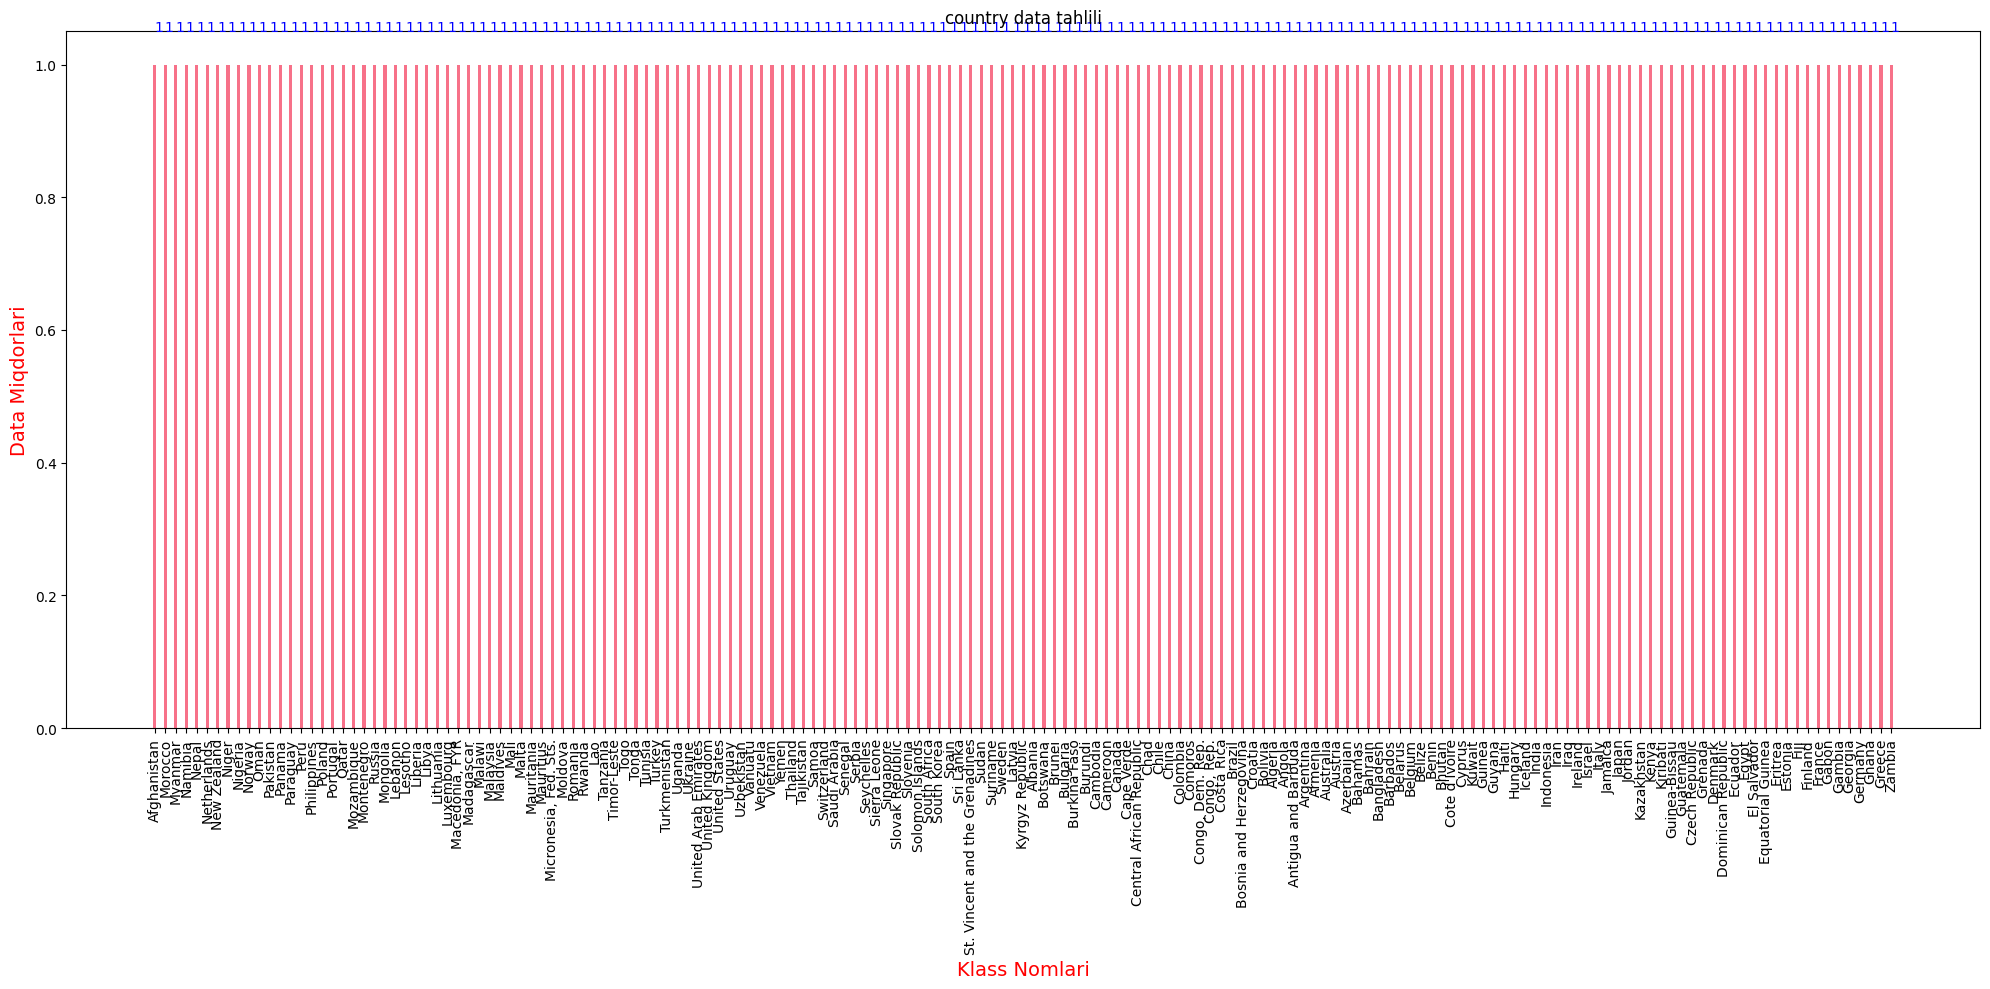

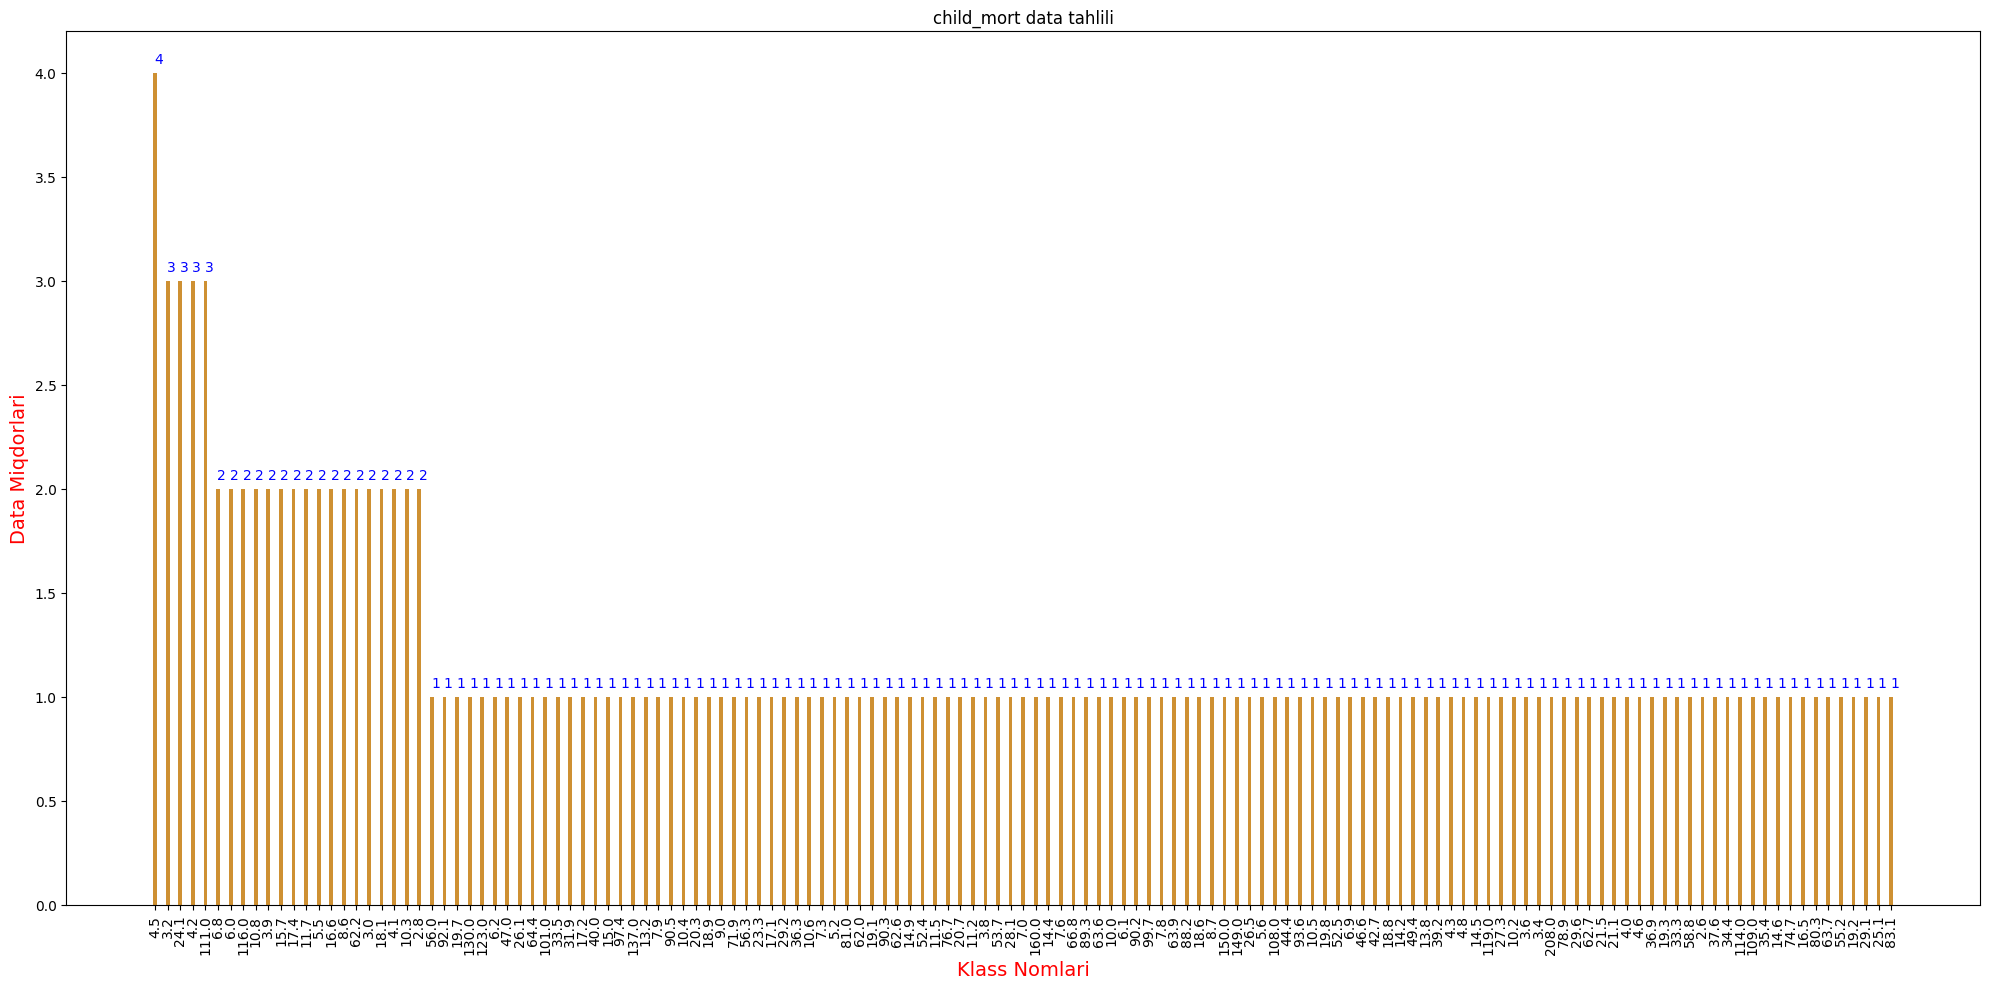

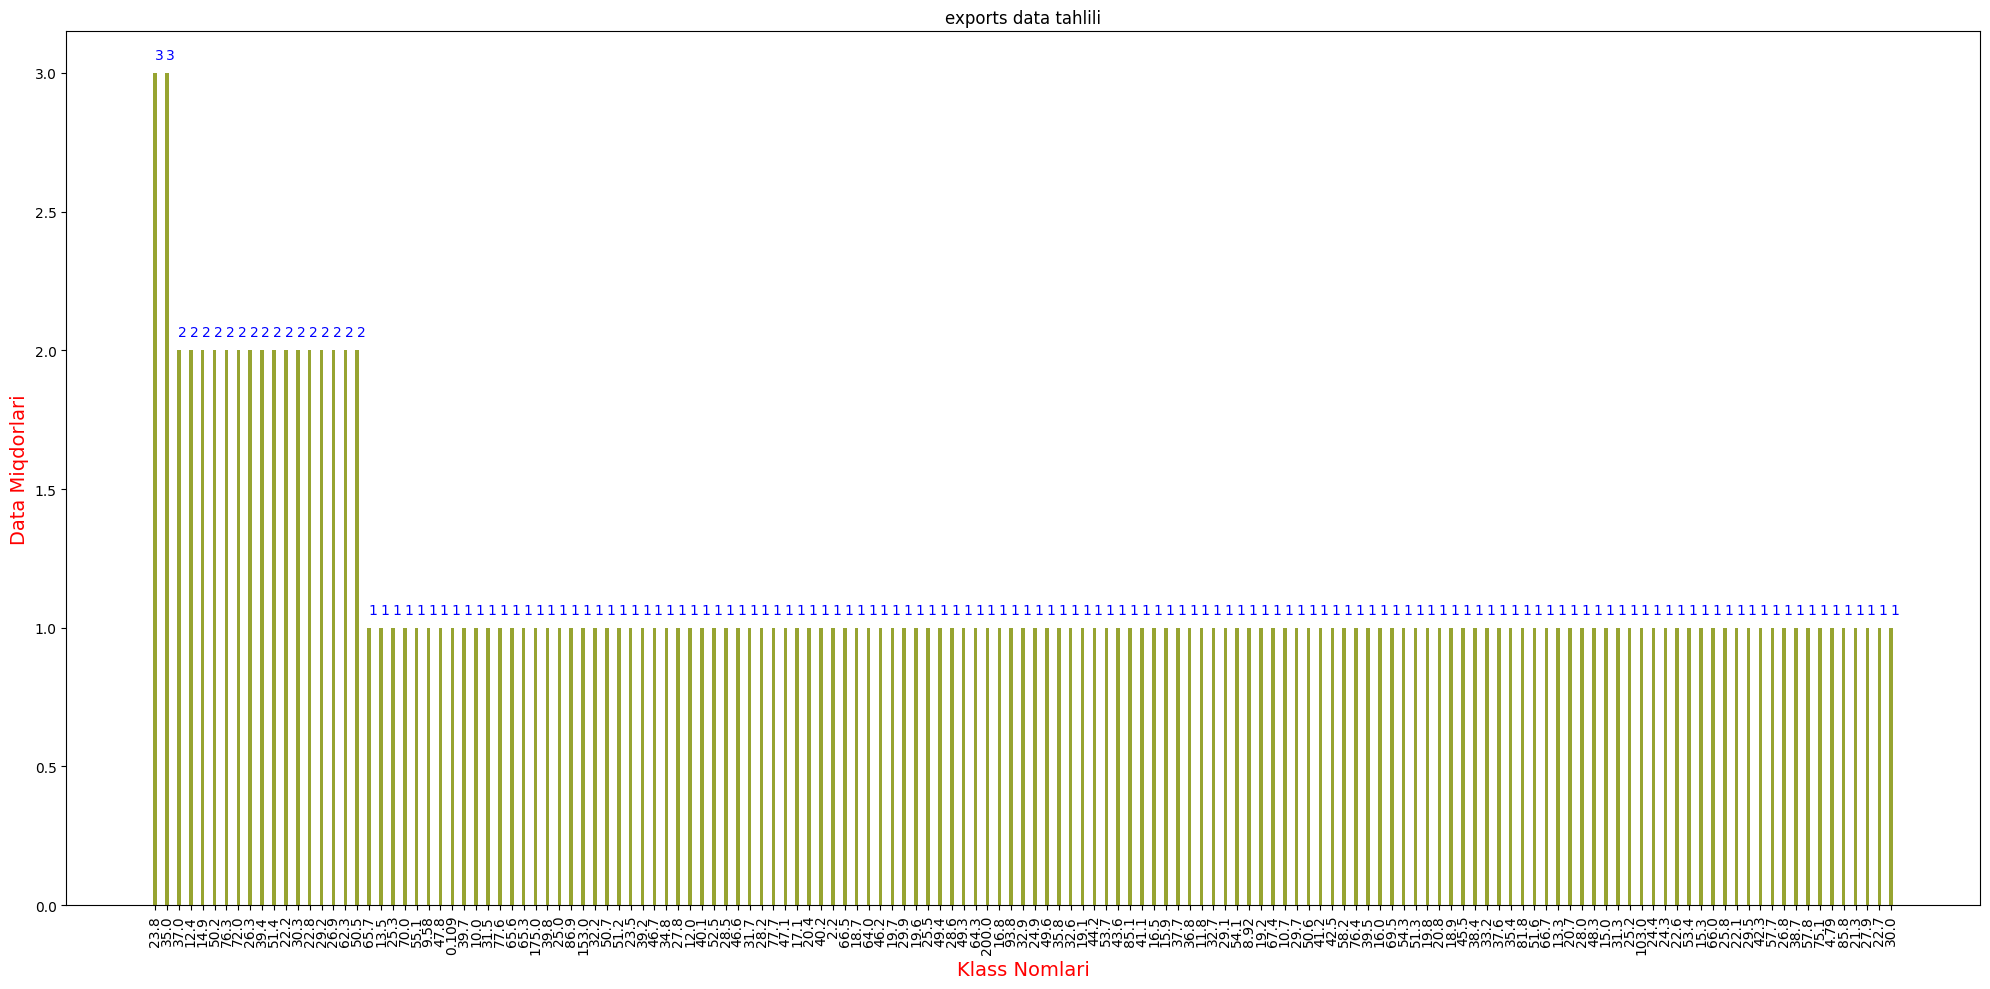

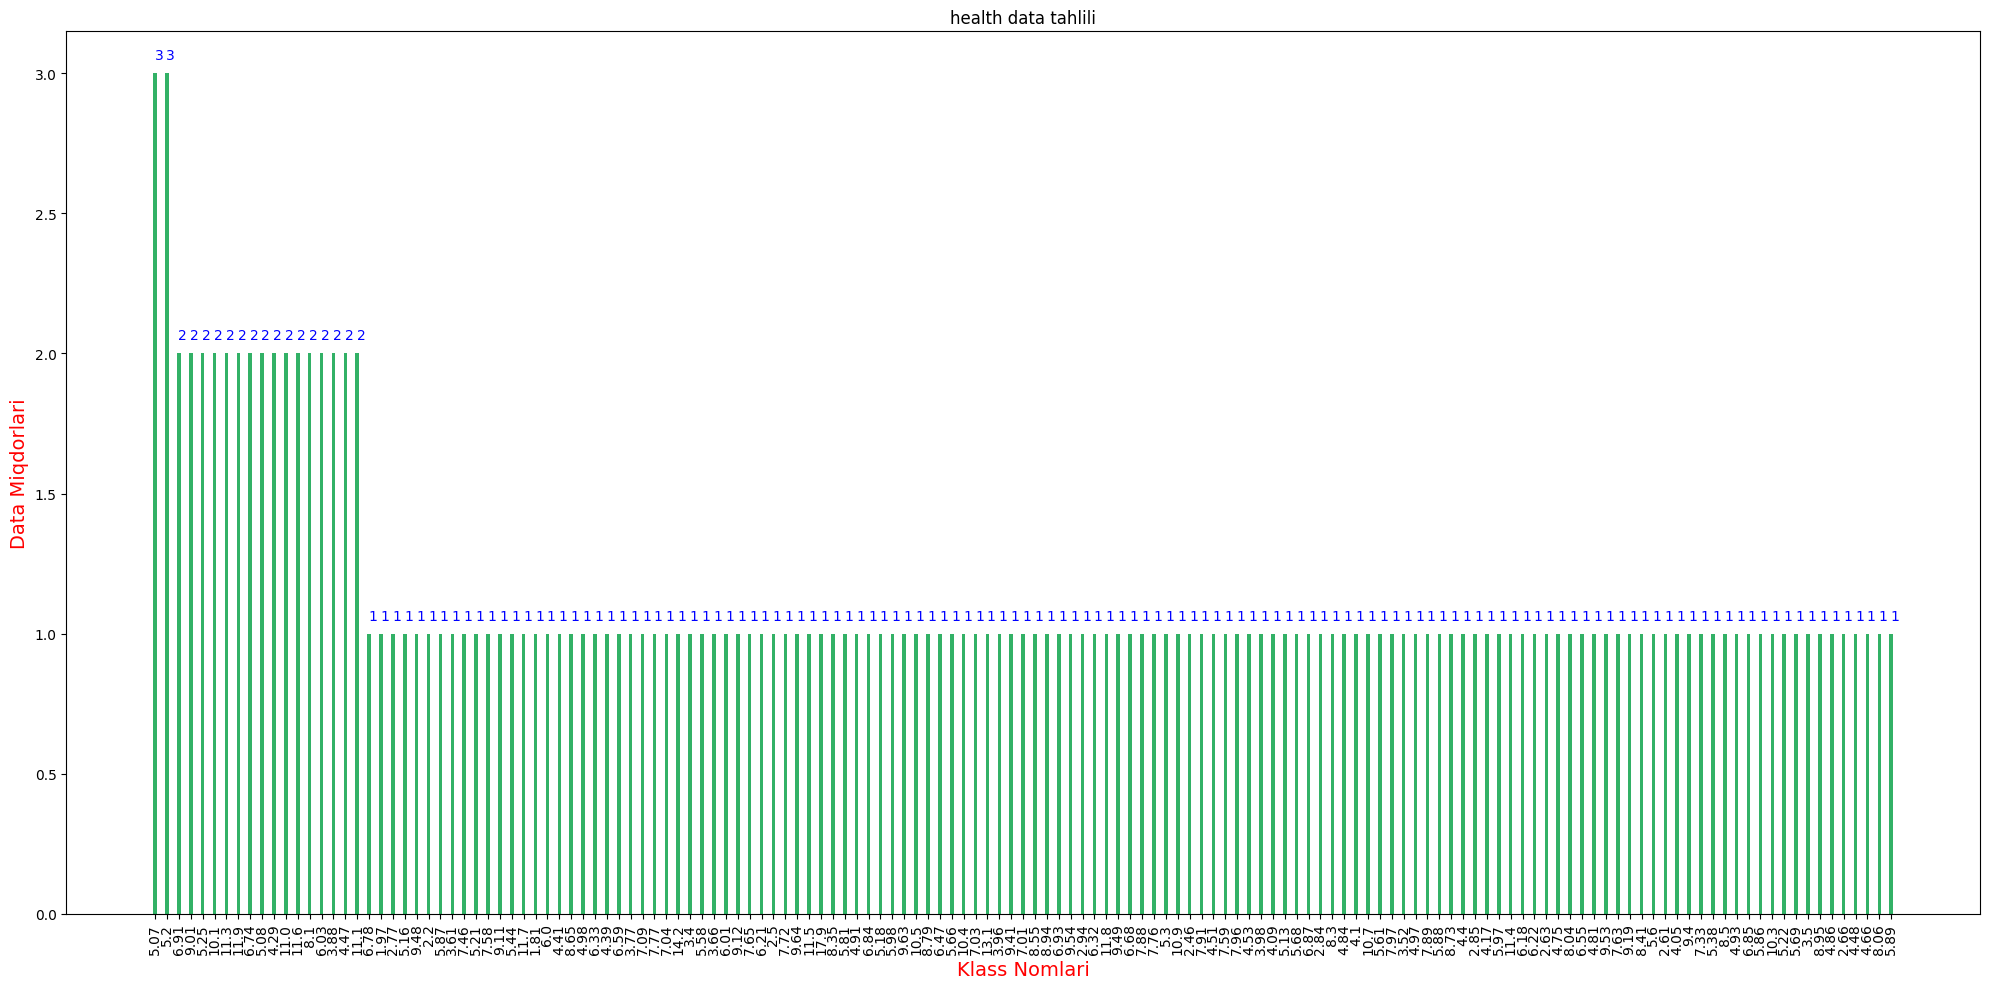

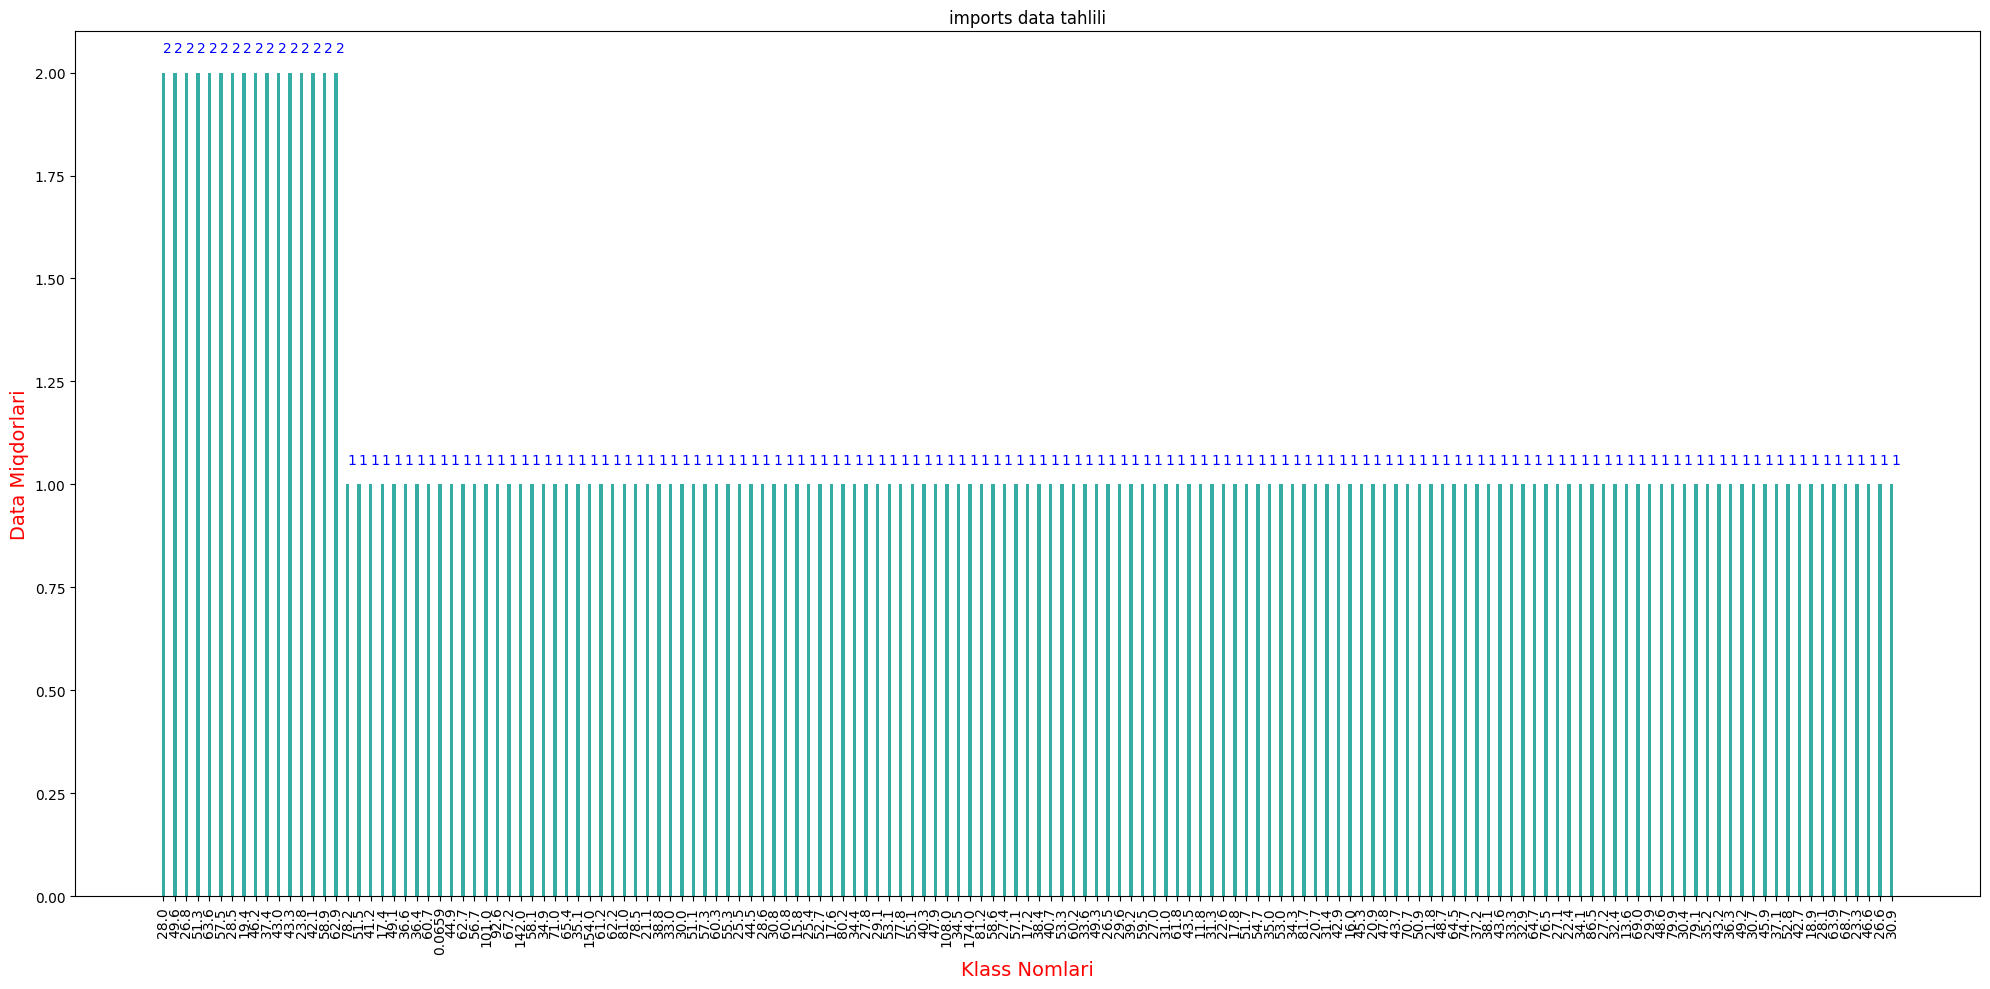

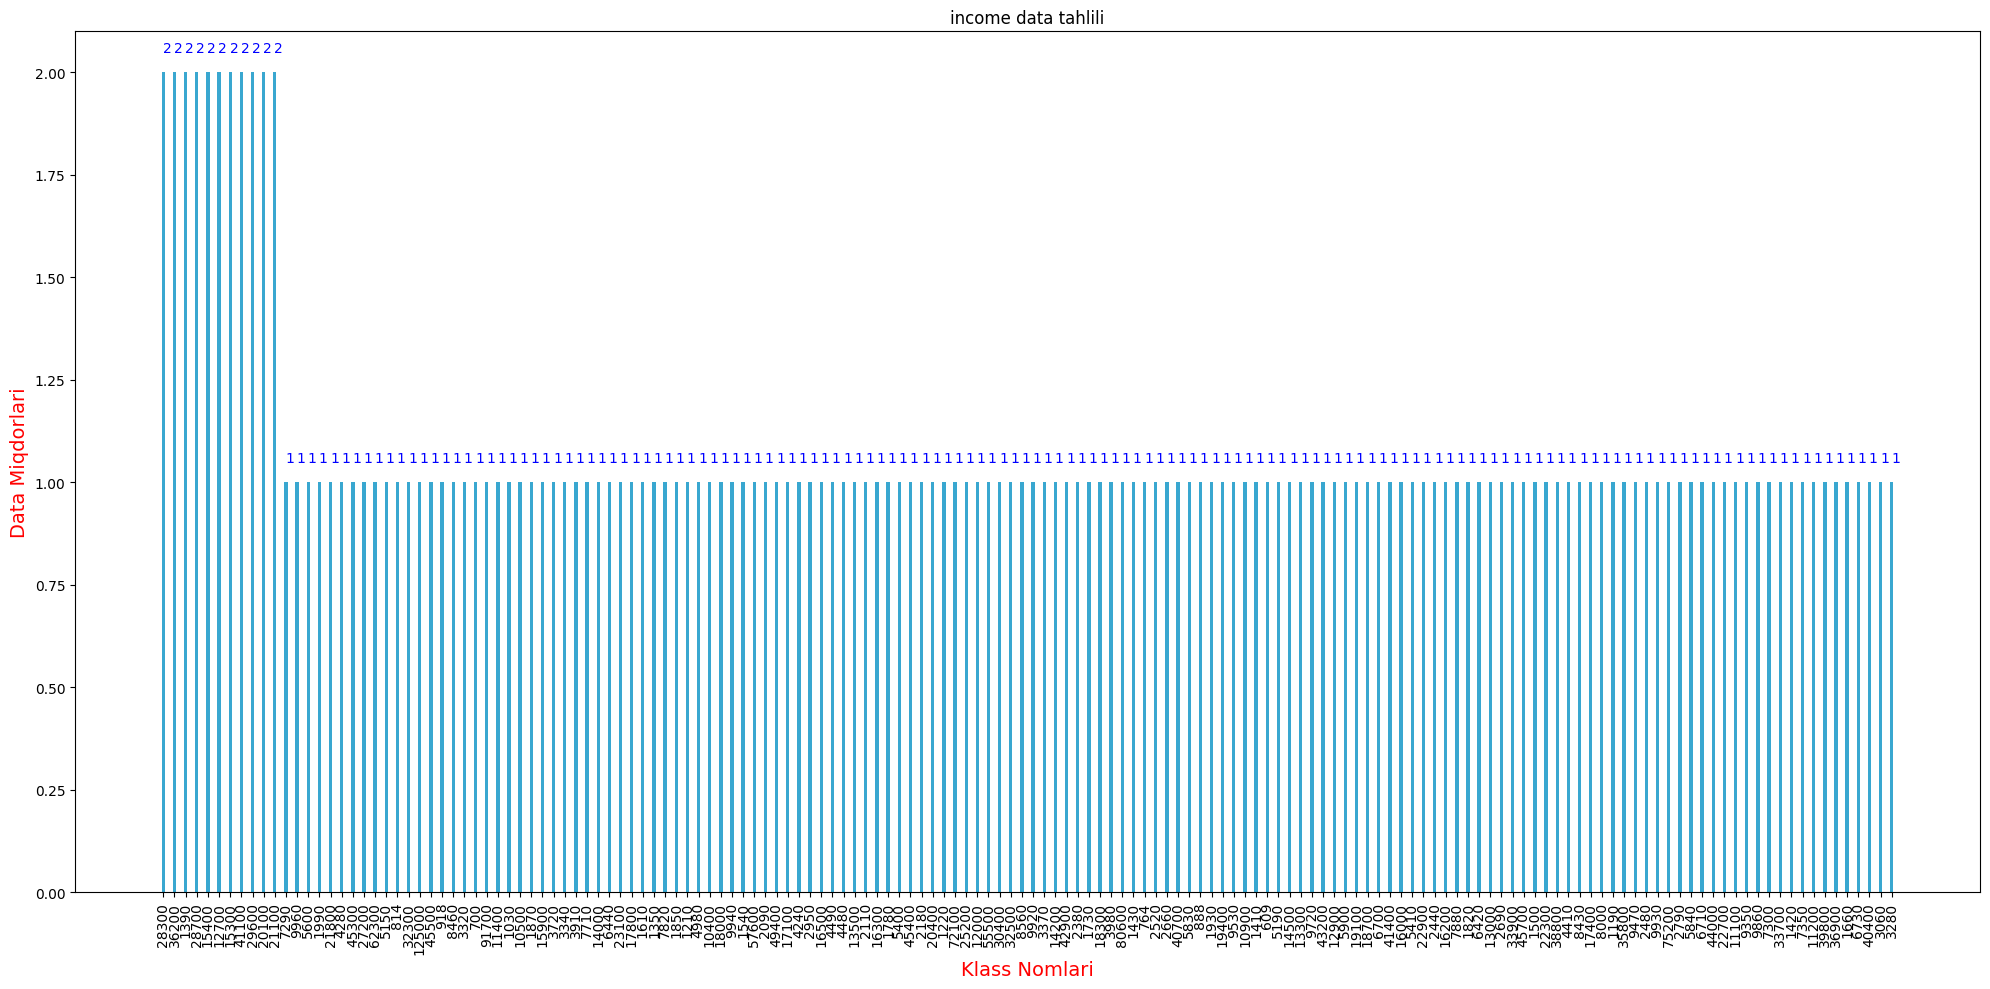

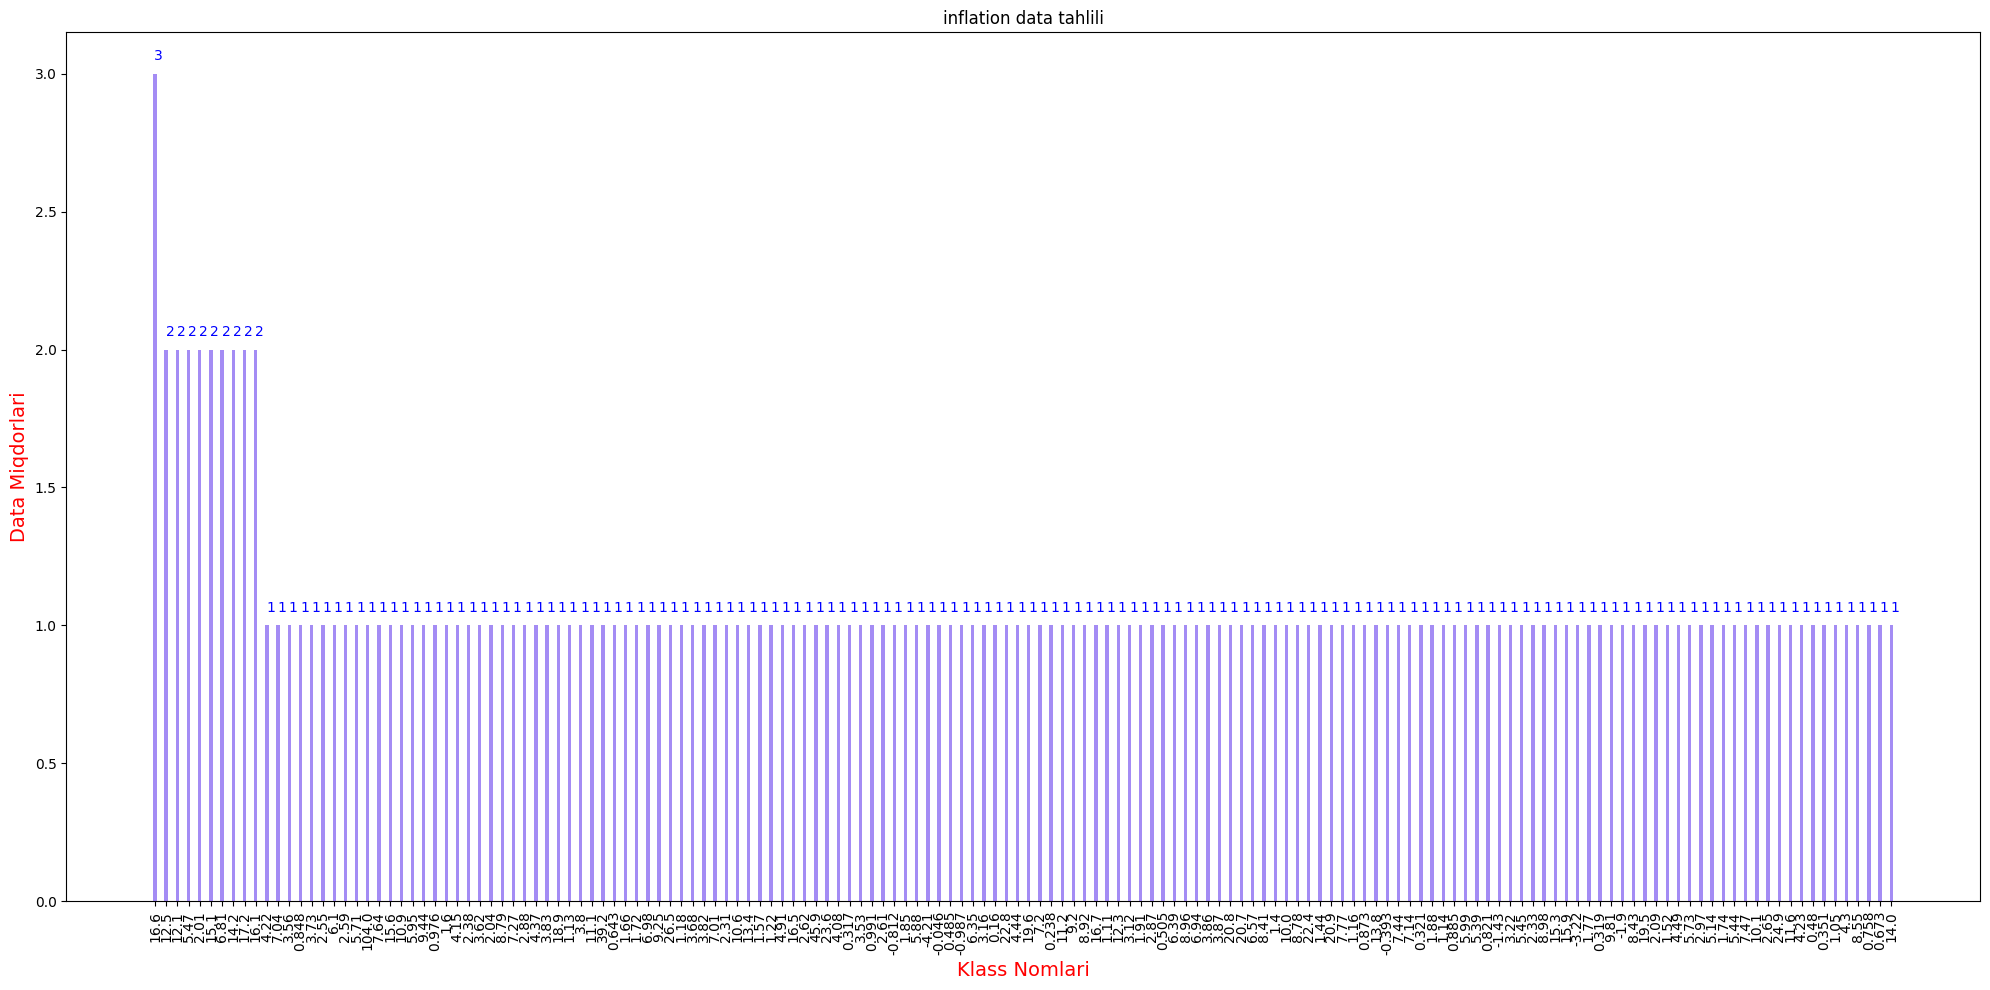

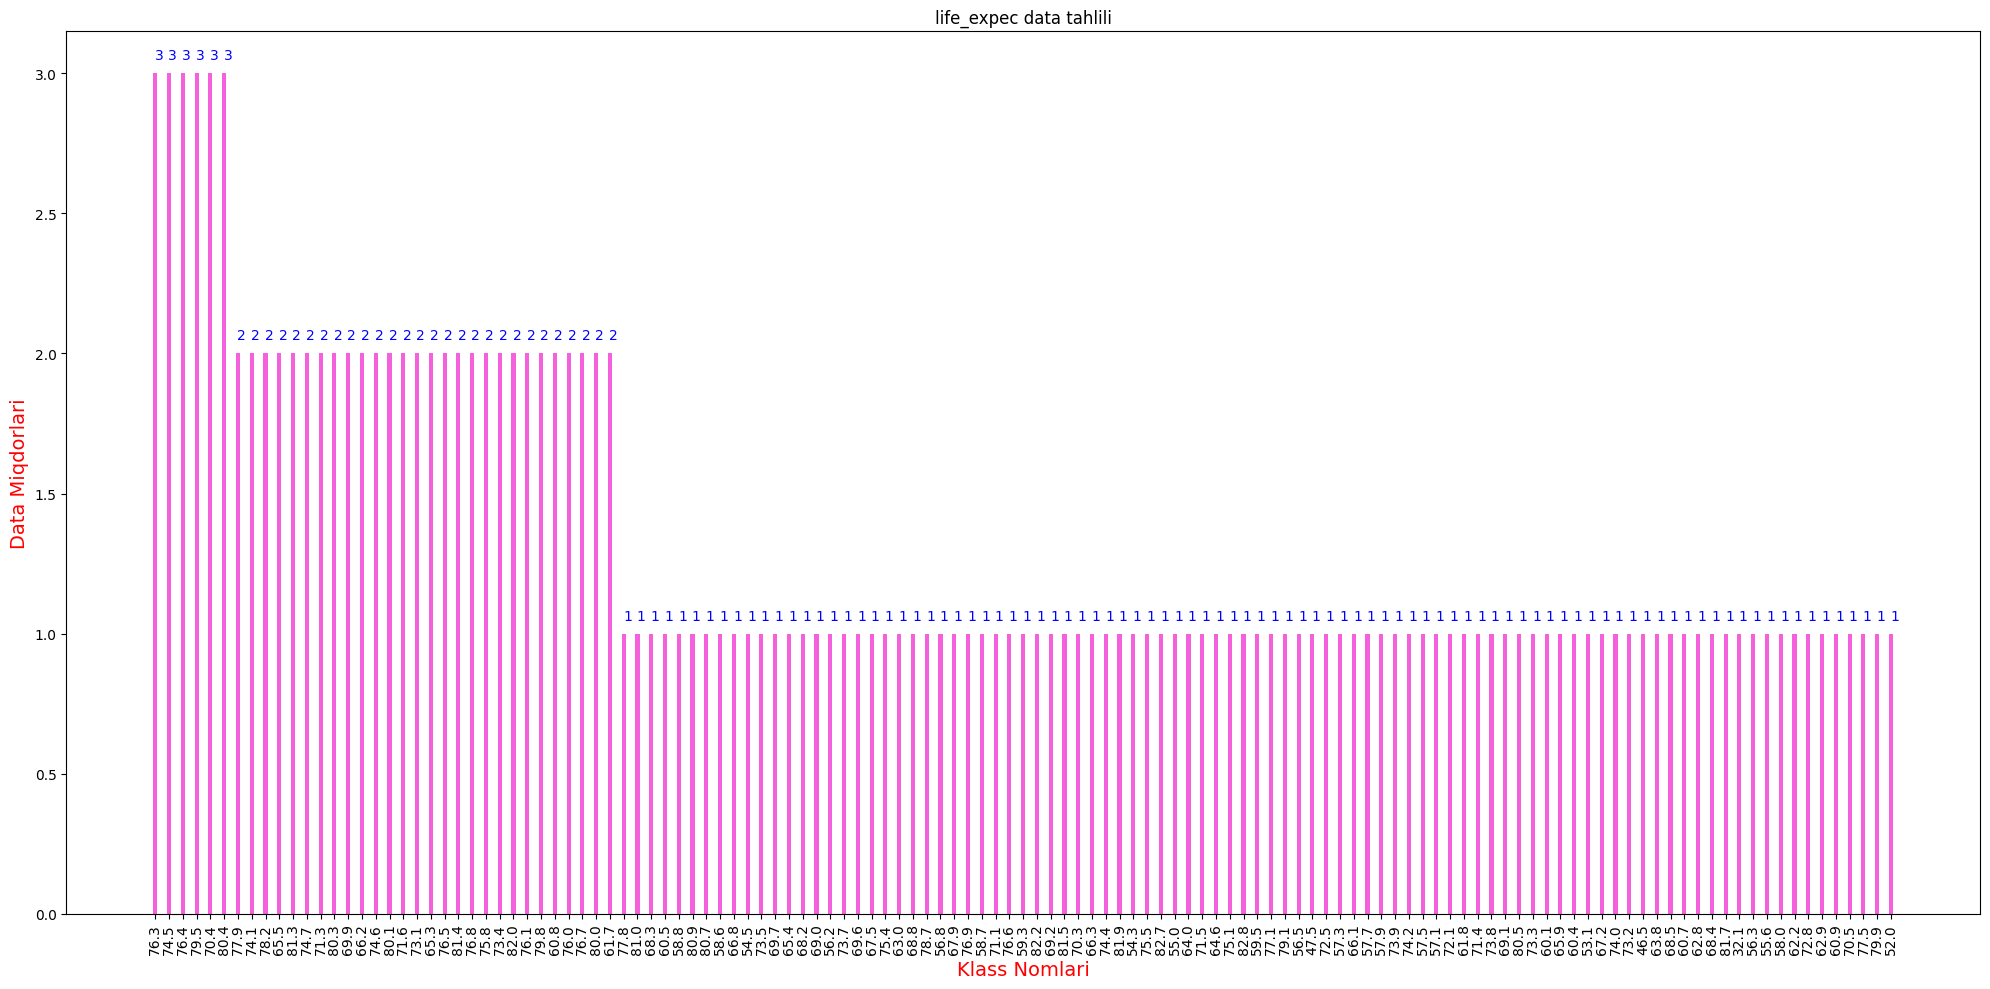

IndexError: list index out of range

In [549]:
for idx, coln in enumerate(human_data.columns):
    data_analysis(data=human_data, column_name=coln, color=palette[idx], bar_width=0.3, text_width=0.05)

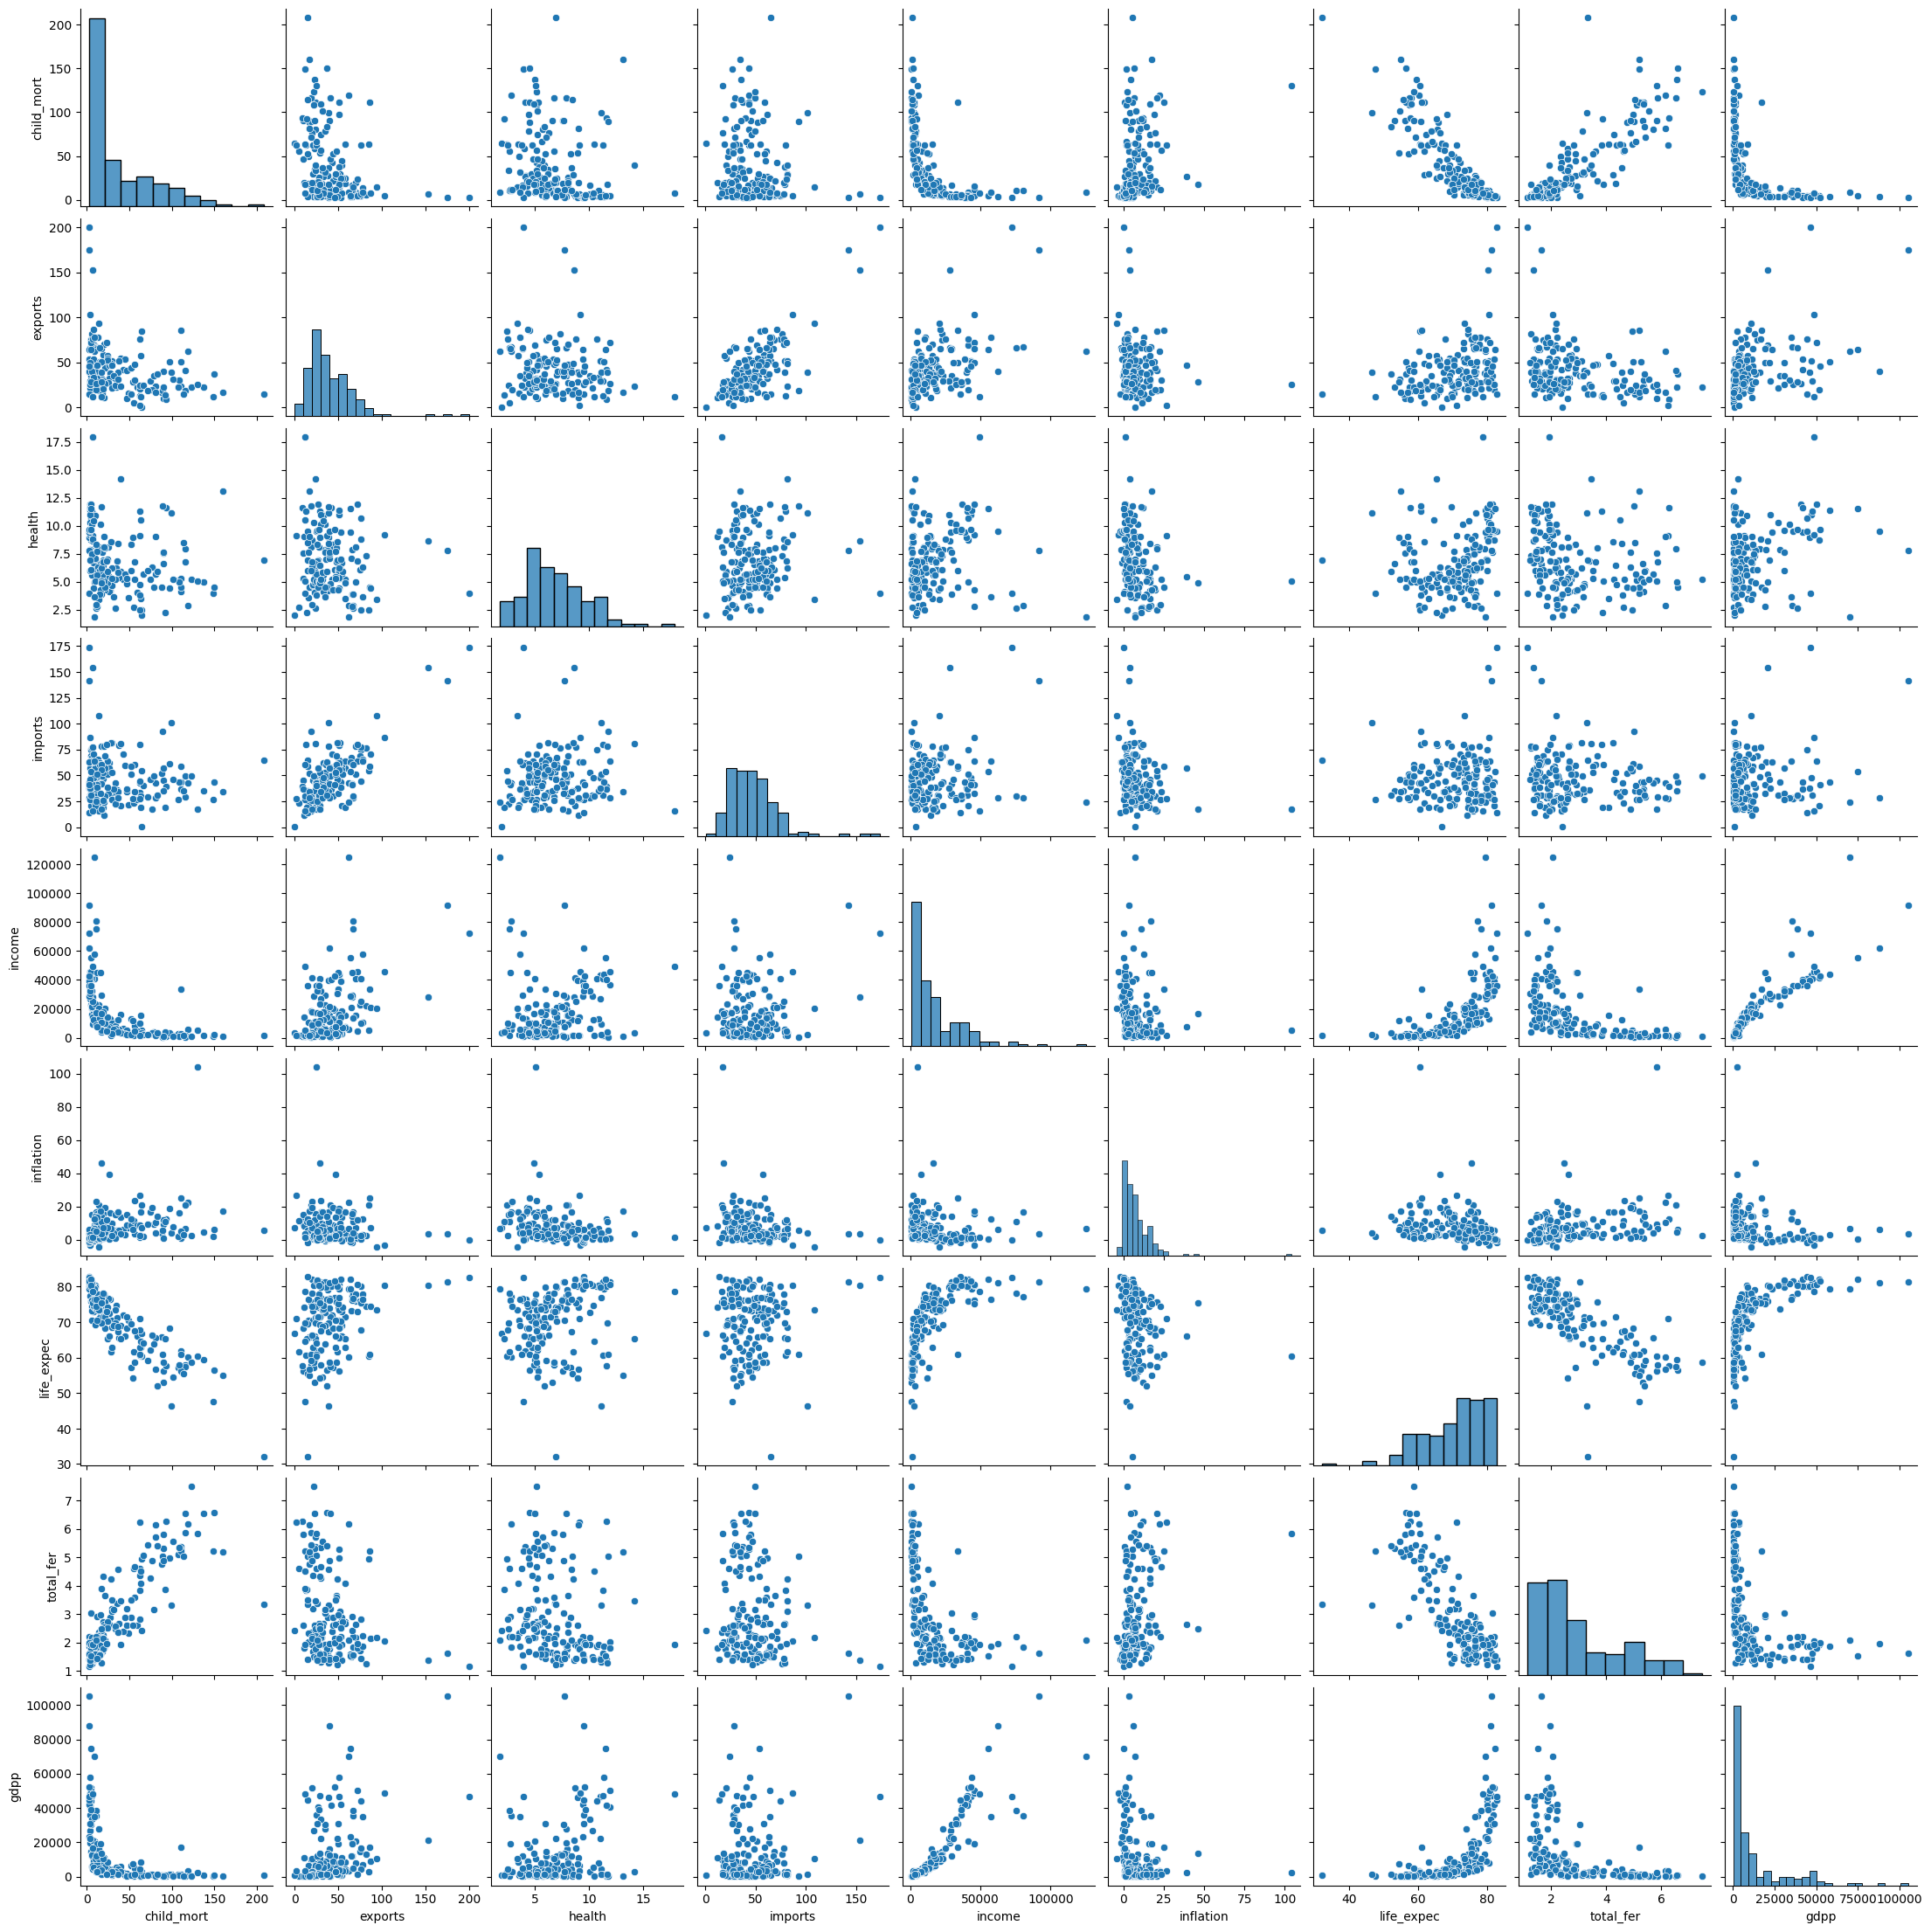

In [550]:
sns.pairplot(human_data)
plt.show()

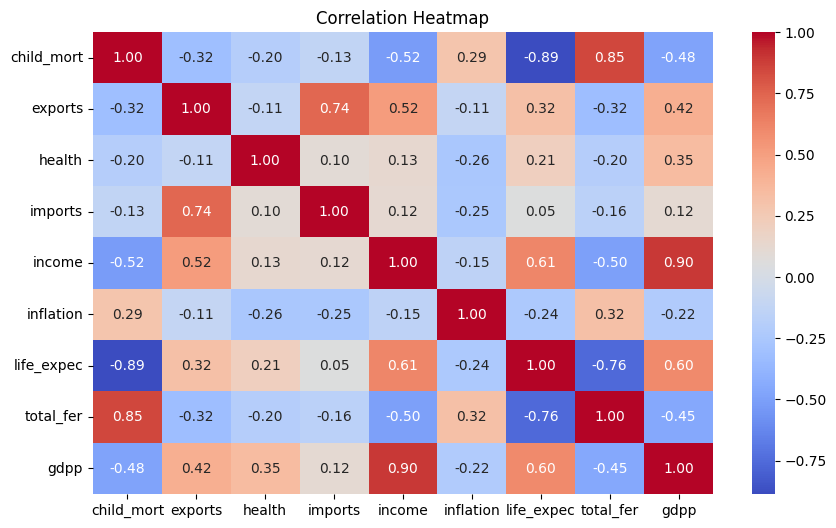

In [554]:
plt.figure(figsize=(10, 6))
sns.heatmap(human_data.drop(columns=["country"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

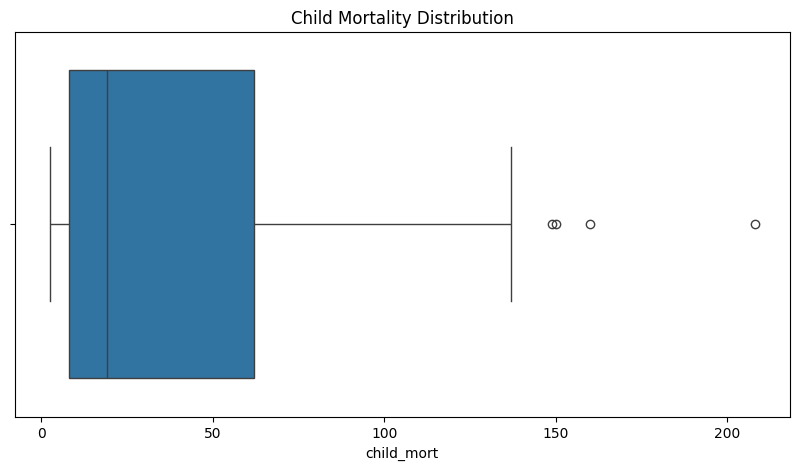

In [555]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=human_data["child_mort"])
plt.title("Child Mortality Distribution")
plt.show()

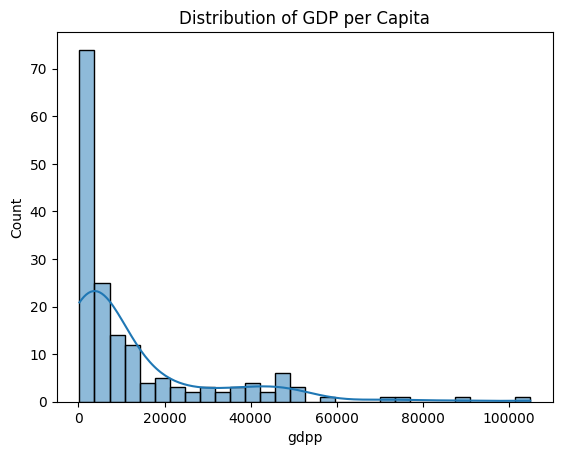

In [556]:
sns.histplot(human_data["gdpp"], bins=30, kde=True)
plt.title("Distribution of GDP per Capita")
plt.show()

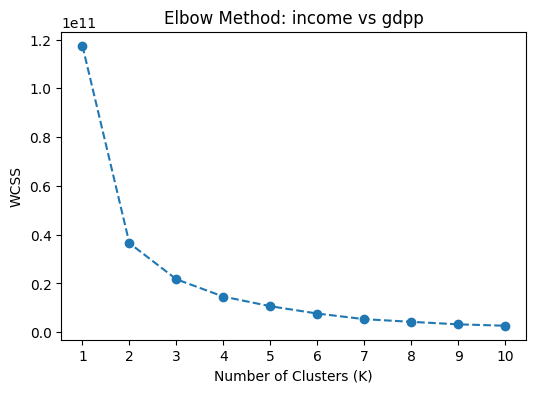

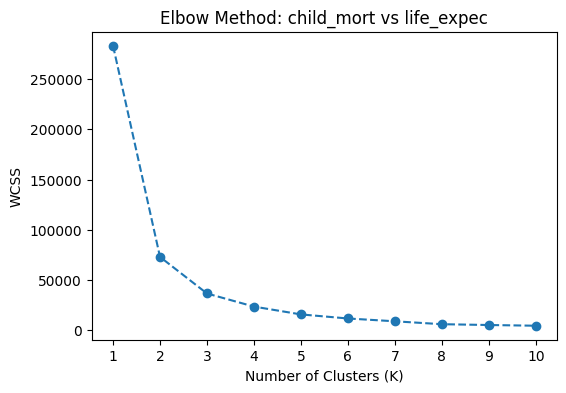

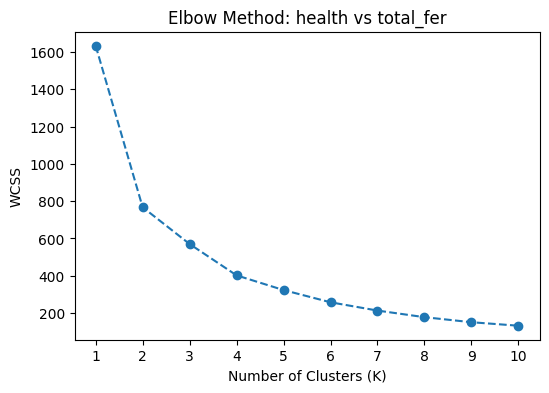

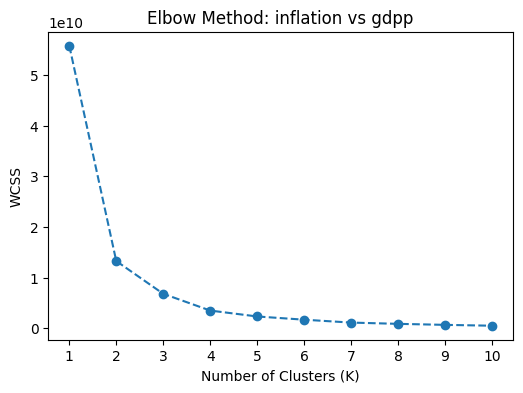

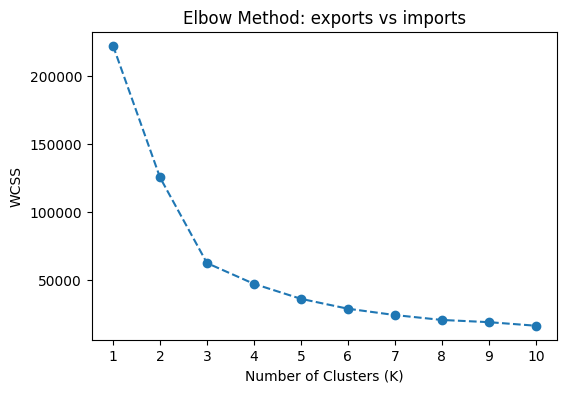

In [558]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Tanlangan 5 ta columnlar
feature_pairs = [
    ("income", "gdpp"),
    ("child_mort", "life_expec"),
    ("health", "total_fer"),
    ("inflation", "gdpp"),
    ("exports", "imports")
]

# Elbow Method
for feature_x, feature_y in feature_pairs:
    X = human_data[[feature_x, feature_y]].dropna().values  
    
    wcss = []  
    for k in range(1, 11):  # K ni 1 dan 10 gacha ko'rib chiqamiz
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    

    plt.figure(figsize=(6, 4))
    plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("WCSS")
    plt.title(f"Elbow Method: {feature_x} vs {feature_y}")
    plt.show()

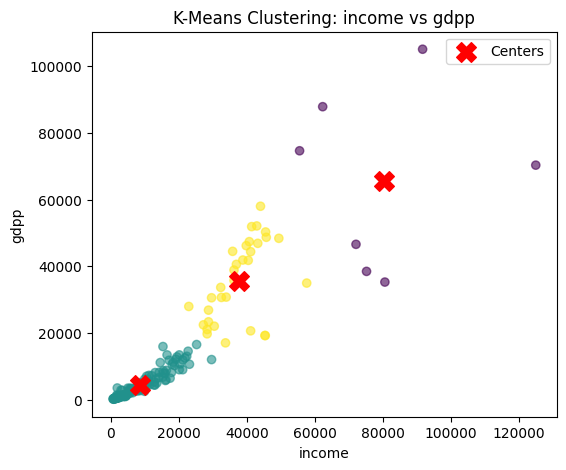

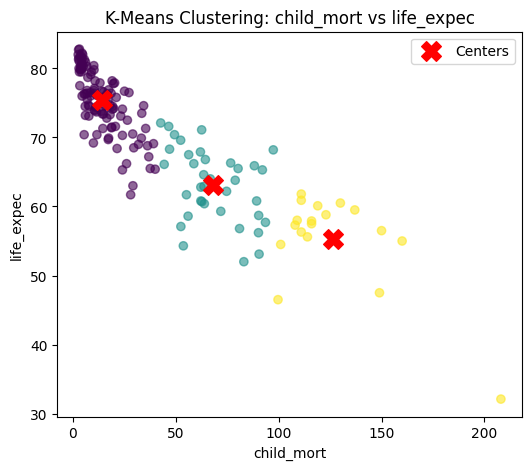

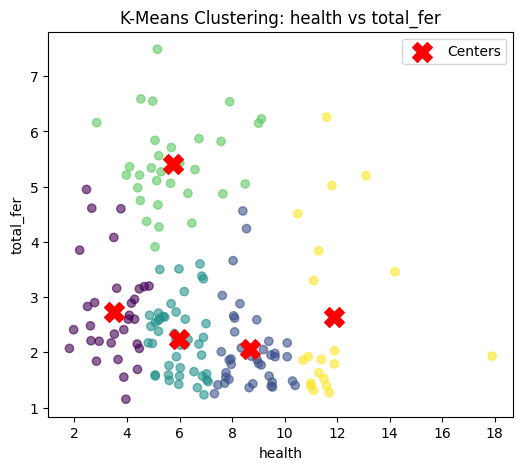

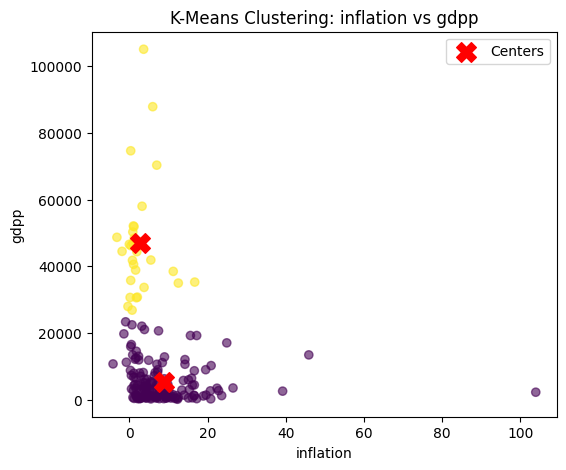

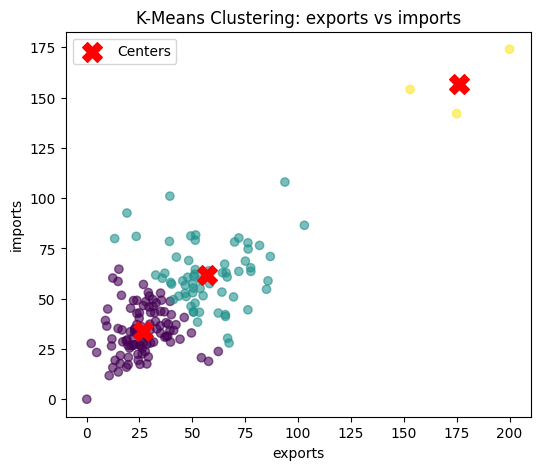

In [559]:
optimal_k = [3, 3, 5, 2, 3]  # Elbow Method dan chiqqan optimal K qiymatlar

for i, (feature_x, feature_y) in enumerate(feature_pairs):
    X = human_data[[feature_x, feature_y]].dropna().values  
    kmeans = KMeans(n_clusters=optimal_k[i], random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)
    
    # Scatter Plot
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="red", marker="X", label="Centers")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f"K-Means Clustering: {feature_x} vs {feature_y}")
    plt.legend()
    plt.show()

In [560]:
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
human_data["label"] = kmeans_final.fit_predict(human_data[["income", "gdpp"]].dropna())

In [562]:
X9 = human_data.drop(columns=["country", "label"]).dropna()
y9 = human_data["label"].dropna()

# Train-test split
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.2, random_state=42)

# Model 
model9 = RandomForestClassifier(n_estimators=100, random_state=42)
model9.fit(X_train9, y_train9)


y_pred9 = model9.predict(X_test9)
accuracy9 = accuracy_score(y_test9, y_pred9)

print(f"Classification Accuracy: {accuracy:.2f}")

Classification Accuracy: 1.00
